In [1]:
import os
import glob
import shutil

import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

#from pathlib import Path


In [2]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

def label_figure(fig, data_identifier):                                                                                                                                     
    fig.text(0, 1,data_identifier, ha='left', va='top', fontsize=8)    

In [3]:
%matplotlib notebook

# Set source dirs

In [4]:
home_dir = '/n/coxfs01/julianarhee/face-tracking'
project = 'facetracking-jyr-2020-01-25' #'sideface-jyr-2020-01-09'
project_dir = os.path.join(home_dir, project)
video_dir = os.path.join(home_dir, project, 'videos')

In [5]:
rootdir = '/n/coxfs01/2p-data'
eyetracker_dir = os.path.join(rootdir, 'eyetracker_tmp')

In [6]:
analysis_dir = os.path.join(project_dir, 'pose-analysis') # DLC analysis output dir

# Network info

In [7]:

projectid = 'facetrackingJan25'
project_dir = os.path.join(home_dir, project)

scorer='DLC_resnet50'
iteration = 1
shuffle = 1
trainingsetindex=0
videotype='.mp4'

snapshot = 391800 #430200 #20900


DLCscorer = '%s_%sshuffle%i_%i' % (scorer, projectid, shuffle, snapshot)
print("Extracting results from scorer: %s" % DLCscorer)

Extracting results from scorer: DLC_resnet50_facetrackingJan25shuffle1_391800


In [8]:
glob.glob(os.path.join(project_dir, 'dlc-models', 'iteration-%i' % iteration,\
                      '%s-trainset95shuffle%i' % (projectid, shuffle), 'train', 'snapshot-*.meta'))


['/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/dlc-models/iteration-1/facetrackingJan25-trainset95shuffle1/train/snapshot-391500.meta',
 '/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/dlc-models/iteration-1/facetrackingJan25-trainset95shuffle1/train/snapshot-391400.meta',
 '/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/dlc-models/iteration-1/facetrackingJan25-trainset95shuffle1/train/snapshot-391600.meta',
 '/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/dlc-models/iteration-1/facetrackingJan25-trainset95shuffle1/train/snapshot-391700.meta',
 '/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/dlc-models/iteration-1/facetrackingJan25-trainset95shuffle1/train/snapshot-391800.meta']

# Get aggregate data

In [9]:
from pipeline.python.classifications import get_dataset_stats as gd
import cPickle as pkl

options = ['-t', 'traces001']
optsE = gd.extract_options(options)

rootdir = optsE.rootdir
aggregate_dir = optsE.aggregate_dir
fov_type = optsE.fov_type
traceid = optsE.traceid
response_type = 'dff'
print aggregate_dir

sdata_fpath = os.path.join(aggregate_dir, 'dataset_info.pkl')
if os.path.exists(sdata_fpath):
    with open(sdata_fpath, 'rb') as f:
        sdata = pkl.load(f)
else:
    sdata = gd.aggregate_session_info(traceid=optsE.traceid, trace_type=optsE.trace_type, 
                                       state=optsE.state, fov_type=optsE.fov_type, 
                                       visual_areas=optsE.visual_areas,
                                       blacklist=optsE.blacklist, 
                                       rootdir=optsE.rootdir)
    with open(sdata_fpath, 'wb') as f:
        pkl.dump(sdata, f, protocol=pkl.HIGHEST_PROTOCOL)


/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/get_dataset_stats.py:17: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/juliana

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/traces/combine_runs.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/julianarhee/anaconda2/

/n/coxfs01/julianarhee/aggregate-visual-areas


/home/julianarhee/Repositories/2p-pipeline/pipeline/python/retinotopy/target_visual_field.py:19: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/julianarhe

# Select data sets where we have DLC data

In [10]:

#excl_sessions = ['20190607']

#incl_sessions = [s for s in incl_sessions if s not in excl_sessions]

#dsets = dsets[dsets['session'].isin(incl_sessions)]

In [11]:
incl_skeys = list(set([os.path.split(f)[-1].split('_f')[0] for f in glob.glob(os.path.join(analysis_dir, '*.h5'))]))

incl_sessions = ['_'.join(s.split('_')[0:2]) for s in incl_skeys]

incl_ixs = [i for i in sdata.index.tolist() if '_'.join([sdata.loc[i]['session'], sdata.loc[i]['animalid']])\
            in incl_sessions]

dsets = sdata.iloc[incl_ixs]

In [12]:
fovnums = [int(fv.split('_')[0][3:]) for fv in dsets['fov']]
dsets['fovnum'] = fovnums


/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
dsets.groupby(['visual_area']).count()


,animalid,experiment,fov,session,fovnum
visual_area,,,,,
Li,45,45,45,45,45
Lm,39,39,39,39,39
V1,40,40,40,40,40


In [14]:
dsets[dsets['session']=='20190607']

,animalid,experiment,fov,session,visual_area,fovnum
20,JC091,rfs10,FOV1_zoom2p0x,20190607,Li,1
21,JC091,gratings,FOV1_zoom2p0x,20190607,Li,1
22,JC091,blobs,FOV1_zoom2p0x,20190607,Li,1
23,JC091,retino,FOV1_zoom2p0x,20190607,Li,1


# Functions

In [15]:
class struct():
    pass

import scipy.stats as spstats
import json
from pipeline.python.classifications import experiment_classes as util

In [16]:
from pipeline.python.classifications import rf_utils as rfutils

# Load data

In [17]:
def load_traces(animalid, session, fovnum, curr_exp, traceid='traces001',
               responsive_test='ROC', responsive_thr=0.05, response_type='dff'):
    
    # Load experiment neural data
    fov = 'FOV%i_zoom2p0x' % fovnum
    exp = util.Objects(animalid, session, fov, traceid=traceid)
    exp.load(trace_type='dff', update_self=True, make_equal=False)
    labels = exp.data.labels.copy()

    # Get stimulus config info
    sdf = exp.data.sdf
    sdf = reformat_morph_values(sdf)
    n_conditions = len(sdf['size'].unique())
    color_list = sns.color_palette('cubehelix', n_conditions)
    cond_colors = dict((k, color_list[i]) for i, k in enumerate(sorted(sdf['size'].unique()))) #.keys()))

    # Get responsive cells
    responsive_cells, ncells_total = exp.get_responsive_cells(response_type=response_type,\
                                                              responsive_test=responsive_test,
                                                              responsive_thr=responsive_thr)
    
    traces = exp.data.traces[responsive_cells]

    return traces, labels, sdf
    
def reformat_morph_values(sdf):
    control_ixs = sdf[sdf['morphlevel']==-1].index.tolist()
    sizevals = np.array([round(s, 1) for s in sdf['size'].unique() if s not in ['None', None] and not np.isnan(s)] )
    sdf.loc[sdf.morphlevel==-1, 'size'] = pd.Series(sizevals, index=control_ixs)
    sdf['size'] = [round(s, 1) for s in sdf['size'].values]

    return sdf


In [18]:
def traces_to_trials(traces, labels):
    '''
    Returns dataframe w/ columns = roi ids, rows = mean response to stim ON per trial
    Last column is config on given trial.
    '''
    s_on = int(labels['stim_on_frame'].mean())
    n_on = int(labels['nframes_on'].mean())

    roi_list = traces.columns.tolist()
    trial_list = np.array([int(trial[5:]) for trial, g in labels.groupby(['trial'])])
    mean_responses = pd.DataFrame(np.vstack([np.nanmean(traces.iloc[g.index[s_on:s_on+n_on]], axis=0)\
                                        for trial, g in labels.groupby(['trial'])]),
                                         columns=roi_list, index=trial_list)

    condition_on_trial = np.array([g['config'].unique()[0] for trial, g in labels.groupby(['trial'])])
    mean_responses['config'] = condition_on_trial

    return mean_responses


In [50]:
def get_mean_luminance(animalid, session, fov, expname='rfs', traceid='traces001',
                       response_type='ROC', fit_thr=0.05):
    # Get RF/screen param info
    screen_info = rfutils.get_screen_info(animalid, session, fov)

    # RF fit data
    exp = util.Objects(animalid, session, fov)
    sdf = reformat_morph_values(exp.get_stimuli())

    exp = util.ReceptiveFields(expname, animalid, session, fov, traceid=traceid)
    #assert exp is not None, "Unable to find RF experiment for %s" % '|'.join([animalid, session, fov])
    
    rfstats, rois_rfs, nrois_total = exp.get_rf_fits(response_type=response_type, fit_thr=fit_thr)
    rfparams = rfutils.get_rfparams(screen_info, rfstats)

    # Check for non-image conditions, i.e., full-screen controls
    images = rfutils.load_image_stimuli()
    image_list = sorted(images.keys(), key=natural_keys)
    all_conditions = sorted(sdf['morphlevel'].unique())
    nonimage_conditions = [i for i in all_conditions if 'M%i' % i not in image_list]
    print("Non image conditions:", nonimage_conditions)
    image_list.extend(nonimage_conditions)

    pix_per_deg = rfparams['pix_per_deg']
    sizes = sorted(sdf['size'].unique())

    lumdf = []
    i = 0
    for curr_object in image_list:
        for size_deg in sizes:
            # Transform stimulus image
            lum_level = None
            if curr_object == -1:
                lum_level = float(sdf[(sdf['morphlevel']==-1) & (sdf['size']==size_deg)]['color']) * 255.
                cfg = sdf[(sdf['morphlevel']==-1) & (sdf['size']==size_deg)].index.tolist()[0]

                imarray = np.ones((rfparams['screen_resolution'][1], rfparams['screen_resolution'][0]))*lum_level
                curr_object_name = 'M%i' % curr_object #'fullscreen'
            else:
                curr_img = images[curr_object]
                imscreen = rfutils.transform_stim_image(curr_img, rfparams, size_deg=size_deg)
                curr_object_name = curr_object
                cfg = sdf[(sdf['morphlevel']==int(curr_object[1:])) & (sdf['size']==size_deg)].index.tolist()[0]
                # Get arrays in correct orientation for multiplying
                imarray = np.flipud(imscreen).copy()

            lumdf.append(pd.DataFrame({'object': curr_object_name,
                                'size': size_deg,
                                'config': cfg,
                                'luminance': imarray.mean()}, index=[i]))
            i += 1
    lumdf = pd.concat(lumdf, axis=0)
    
    return lumdf

In [19]:
# Select response filters
responsive_test='ROC'
responsive_thr = 0.05
response_type = 'dff'


# First load or create blob data

In [21]:
always_exclude = ['20190426_JC078']


In [22]:
load_data = False
data_dir = os.path.join(aggregate_dir, 'data-stats')
stats_id = 'blobs_%s-%s_%s-thr-%.2f' % (traceid, response_type, responsive_test, responsive_thr)
print(stats_id)
blobsdata_outfile = os.path.join(data_dir, '%s.pkl' % stats_id)
print("BLOBS: data from -- %s" % blobsdata_outfile)

if os.path.exists(blobsdata_outfile):
    with open(blobsdata_outfile, 'rb') as f:
        DATA = pkl.load(f)
else:
    load_data = True

blobs_traces001-dff_ROC-thr-0.05
BLOBS: data from -- /n/coxfs01/julianarhee/aggregate-visual-areas/data-stats/blobs_traces001-dff_ROC-thr-0.05.pkl


In [23]:
if load_data:
    dsets = sdata[sdata['experiment']=='blobs']
    #print(dsets.shape)
    fovnums = [int(fv.split('_')[0][3:]) for fv in dsets['fov']]
    dsets['fovnum'] = fovnums

    DATA = {}
    curr_exp = 'blobs'
    for (animalid, session, fovnum), g in dsets.groupby(['animalid', 'session', 'fovnum']):

        datakey = '%s_%s_fov%i' % (session, animalid, fovnum)
        
        if '%s_%s' % (session, animalid) in always_exclude:
            continue

        # Load traces
        traces, labels, sdf = load_traces(animalid, session, fovnum, curr_exp, 
                                          traceid=traceid, response_type=response_type,
                                          responsive_test=responsive_test, responsive_thr=responsive_thr)
        # Calculate mean trial metric
        mean_responses = traces_to_trials(traces, labels)

        DATA['%s' % datakey] = {'data': mean_responses,
                                'sdf': sdf}
        
    # Save
    with open(blobsdata_outfile, 'wb') as f:
        pkl.dump(DATA, f, protocol=pkl.HIGHEST_PROTOCOL)
    print("Done!")
    

In [24]:
len(DATA.keys())


36

In [25]:
blob_dsets = sdata[sdata['experiment']=='blobs']
blob_dsets.shape

(37, 5)

In [26]:
rf_dsets = sdata[sdata['experiment'].isin(['rfs', 'rfs10'])]
rf_dsets.shape

(71, 5)

# Select datasets where we have objects + RFs

In [27]:
include_sessions = []
included_ixs = []
for (animalid, session, fov), g in sdata.groupby(['animalid', 'session', 'fov']):
    if any(['rf' in v for v in g['experiment'].values]) and 'blobs' in g['experiment'].values:
        include_sessions.append((animalid, session, fov))
        included_ixs.extend(g.index.tolist())
        
tmpdsets = sdata.loc[included_ixs]

incl_skeys = list(set([os.path.split(f)[-1].split('_f')[0] for f in glob.glob(os.path.join(analysis_dir, '*.h5'))]))
incl_sessions = ['_'.join(s.split('_')[0:2]) for s in incl_skeys]
incl_ixs = [i for i in tmpdsets.index.tolist() if '_'.join([tmpdsets.loc[i]['session'], tmpdsets.loc[i]['animalid']])\
            in incl_sessions]
dsets = tmpdsets.loc[incl_ixs]


fovnums = [int(fv.split('_')[0][3:]) for fv in dsets['fov']]
dsets['fovnum'] = fovnums

print(dsets.shape)

(124, 6)


In [28]:
print('blobs', dsets[dsets['experiment']=='blobs'].shape)
print('RFs', dsets[dsets['experiment'].isin(['rfs', 'rfs10'])].shape)

('blobs', (32, 6))
('RFs', (37, 6))


In [29]:
dsets.groupby(['visual_area']).count()

,animalid,experiment,fov,session,fovnum
visual_area,,,,,
Li,45,45,45,45,45
Lm,39,39,39,39,39
V1,40,40,40,40,40


# Get RF luminance info

In [30]:
stimulus_dir = '/home/julianarhee/Repositories/protocols/physiology/stimuli/images'

load_data = False
data_dir = os.path.join(aggregate_dir, 'data-stats')
stats_id = 'rf-luminances_%s-%s_blobs' % (traceid, response_type)
print(stats_id)
rfsdata_outfile = os.path.join(data_dir, '%s.pkl' % stats_id)
print("Receptive Fields: data from -- %s" % rfsdata_outfile)

if os.path.exists(rfsdata_outfile):
    with open(rfsdata_outfile, 'rb') as f:
        RFDATA = pkl.load(f)
else:
    load_data = True

rf-luminances_traces001-dff_blobs
Receptive Fields: data from -- /n/coxfs01/julianarhee/aggregate-visual-areas/data-stats/rf-luminances_traces001-dff_blobs.pkl


In [31]:
load_data

False

In [32]:
if load_data:
    rf_dsets = dsets[dsets['experiment'].isin(['rfs', 'rfs10'])]
    print(rf_dsets.shape)

    RFDATA = {}
    for (animalid, session, fovnum, curr_exp), g in rf_dsets.groupby(['animalid', 'session', 'fovnum', 'experiment']):
        datakey = '%s_%s_fov%i_%s' % (session, animalid, fovnum, curr_exp)
        rflum_df = rfutils.get_rf_luminances(animalid, session, fovnum, curr_exp, 
                                             traceid=traceid, response_type=response_type,
                                             stimulus_dir=stimulus_dir)
        RFDATA[datakey] = rflum_df
        
    # Save
    with open(rfsdata_outfile, 'wb') as f:
        pkl.dump(RFDATA, f, protocol=pkl.HIGHEST_PROTOCOL)
    print("Done!")

# Load pupil data

In [34]:
state_dir = os.path.join(aggregate_dir, 'behavior-state')

snapshot = 391800

pupildata_outfile = os.path.join(state_dir, 'blobs_pupil-stimulus_snapshot-%i.pkl' % (snapshot))
print(pupildata_outfile)
assert os.path.exists(pupildata_outfile), "Pupil data not found (snapshot: %i)" % snapshot

print("...loading pupil data")
with open(pupildata_outfile, 'rb') as f:
    PUPILDATA = pkl.load(f)


/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/blobs_pupil-stimulus_snapshot-391800.pkl
...loading pupil data


# Load snout data

In [35]:
state_dir = os.path.join(aggregate_dir, 'behavior-state')

snapshot = 391800

snoutdata_outfile = os.path.join(state_dir, 'blobs_snout2_snapshot-%i.pkl' % (snapshot))
print(snoutdata_outfile)
assert os.path.exists(snoutdata_outfile), "Snout data not found (snapshot: %i)" % snapshot

print("...loading snout data")
with open(snoutdata_outfile, 'rb') as f:
    SNOUTDATA = pkl.load(f)


/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/blobs_snout2_snapshot-391800.pkl
...loading snout data


# Import and funcs

In [36]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, Lasso, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer, quantile_transform
#from sklearn.compose import TransformedTargetRegressor
import sklearn.metrics as skmetrics #import median_absolute_error, r2_score
from matplotlib.ticker import FormatStrFormatter

def zscore_array(v):
    return (v-v.mean())/v.std()

import pprint
pp = pprint.PrettyPrinter(indent=4, width=80)

In [37]:

def get_sample_data(rid, rf_luminances, mean_responses, *args):
    
    tmprf = rf_luminances[(rf_luminances['rid']==rid)].copy()
    xx = [zscore_array( np.array([float(tmprf[tmprf['config']==cfg]['RF_luminance'].values) \
                   for cfg in mean_responses['config']]) ) ]
    
    for arg in args:
        xx.append(arg)
    #print("Using %i regressors" % len(xx))
    regressor_placeholders = ['x%i' % i for i in np.arange(0, len(xx))]
        
    Xs = pd.DataFrame(np.vstack(xx).T, columns=regressor_placeholders)
    #print(Xs.shape)
    ys = mean_responses[rid]
    
    return Xs, ys


In [38]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
import matplotlib.cm as cm

def temporal_downsample(trace, windowsz):
    tmp1=np.concatenate((np.ones(windowsz)*trace[0], trace, np.ones(windowsz)*trace[-1]),0)
    tmp2=np.convolve(tmp1, np.ones(windowsz)/windowsz, 'same')
    tmp2=tmp2[windowsz:-windowsz]
    return tmp2

def create_color_bar(fig, hue_colors, orientation='horizontal', cbar_axes=[0.58, 0.17, 0.3, 0.02]):

    cmap = ListedColormap(hue_colors)
    bounds = np.arange(0, len(hue_colors))
    norm = BoundaryNorm(bounds, cmap.N)
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array(bounds)

    cbar_ax = fig.add_axes(cbar_axes)
    cbar = fig.colorbar(mappable, cax=cbar_ax, boundaries=np.arange(-0.5,len(hue_colors),1), \
                        ticks=bounds, norm=norm, orientation='horizontal')
    return cbar


def pretty_psth(roi_traces, labels, sdf, colormap='coolarm', ymax=None):
    morphs = np.array(sorted(sdf['morphlevel'].unique()))
    sizes = np.array(sorted(sdf['size'].unique()))

    transform_param = 'size'
    transform_values = sorted(sdf[transform_param].unique())
    hue_param = 'morphlevel'
    hue_values = sorted(sdf[hue_param].unique())

    hue_colors = sns.color_palette(colormap, n_colors=len(hue_values))
    if hue_param == 'morphlevel':
        hue_colors[0] = (0, 0, 0)
        new_colors = sns.color_palette(colormap, n_colors=len(hue_values)-1)
        hue_colors[1:] = new_colors
        
    min_val, max_val = 0, 0
    windowsz=5


    n_transforms = len(sizes)
    fig, axes = pl.subplots(1, len(transform_values), figsize=(8,3), sharex=True)
    for hi, hue_value in enumerate(hue_values):
        currcfgs = sdf[sdf[hue_param]==hue_value].index.tolist()
        currlabels = labels[labels['config'].isin(currcfgs)]
        for cfg, g in currlabels.groupby(['config']):
            currsz = sdf[transform_param][cfg]
            plot_ix = transform_values.index(currsz)
            tsec =  np.nanmean(np.vstack(g.groupby(['trial'])['tsec'].apply(np.array).values), axis=0).astype(float)
            meantrace = np.nanmean(np.array([roi_traces[gg.index] for trial, gg in g.groupby(['trial'])]), axis=0)
            semtrace = spstats.sem(np.array([roi_traces[gg.index] for trial, gg in g.groupby(['trial'])]), axis=0, nan_policy='omit')

            st = temporal_downsample(tsec, windowsz)
            sm = temporal_downsample(meantrace, windowsz)
            ss = temporal_downsample(semtrace, windowsz)

            axes[plot_ix].plot(st, sm, color=hue_colors[hi], label=hue_value, lw=0.5)
            axes[plot_ix].fill_between(st, sm+ss, sm-ss, color=hue_colors[hi], alpha=0.2)
            max_val = max([max_val, (sm+ss).max() ])
            min_val = min( [min_val, (sm-ss).min()])

    if ymax is None:
        ymax = int(np.floor(max_val))
    for ai, (ax, sz) in enumerate(zip(axes.flat, transform_values)):
        ax.set_title(int(sz))
        ax.set_ylim([min_val, max_val])
        ax.tick_params(which='both', axis='both', length=0)
        if ai == 0:
            ax.set_xticks([0, 1])
            ax.set_xticklabels([''])
            ax.set_xlabel('1 s')
            ax.set_yticks([0, ymax])
            ax.set_yticklabels([''])
            ax.set_ylabel('%.1f dF/F' % ymax)
            sns.despine(trim=True, ax=ax, offset=4)
        else:
            sns.despine(trim=True, ax=ax, offset=4, left=True, bottom=False)
            ax.set_yticklabels([''])
            ax.set_yticks([]) 
    pl.subplots_adjust(top=0.7, bottom=0.3, left=0.1)
    cbar = create_color_bar(fig, hue_colors, cbar_axes=[0.35, 0.15, 0.3, 0.02])
    cbar.ax.tick_params(axis='both', which='both',length=0)
    cbar.ax.set_xticklabels(hue_values, fontsize=6) #(['%i' % i for i in morphlevels])  # horizontal colorbar
    cbar.ax.set_xlabel(hue_param, fontsize=10)
    cbar.ax.set_xticklabels(hue_values, fontsize=6) #(['%i' % i for i in morphlevels])  # horizontal colorbar
    return fig


#### Test w/ 1 dataset

In [176]:
# # Select a dataset to test
# animalid = 'JC110'
# session = '20191006'
# fovnum = 1 #'FOV1_zoom2p0x'
# traceid = 'traces001'

# # Select a dataset to test
# animalid = 'JC084'
# session = '20190522'
# fovnum = 1 #'FOV1_zoom2p0x'
# traceid = 'traces001'

# # Select a dataset to test
# animalid = 'JC099'
# session = '20190609'
# fovnum = 1 #'FOV1_zoom2p0x'
# traceid = 'traces001'

# Select a dataset to test
animalid = 'JC091'
session = '20190614' #20190606'
fovnum = 1 #'FOV1_zoom2p0x'
traceid = 'traces001'

In [127]:
# traces, labels, sdf = load_traces(animalid, session, fovnum, curr_exp, traceid=traceid, response_type=response_type,
#                                   responsive_test=responsive_test, responsive_thr=responsive_thr)

# mean_responses = traces_to_trials(traces, labels)


# Set output dir

In [46]:
neuraltypes_dir = os.path.join(aggregate_dir, 'behavior-state', 'neural-types')
if not os.path.exists(neuraltypes_dir):
    os.makedirs(neuraltypes_dir)
print(neuraltypes_dir)

/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/neural-types


## GLM: luminance vs. pupil
regressors:  RF-luminance vs. pupil-diam
filter:  only fit cells with good RF fits + pass ROC responsivity test for blobs

In [39]:
regdfsimple = []
for (visual_area, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):
    
    datakey = '%s_%s_fov%i' % (session, animalid, fovnum)
    print(datakey)

    # OBJECT data and info
    mean_responses = DATA[datakey]['data'].copy()
    sdf = DATA[datakey]['sdf'].copy()
    rois_objects = mean_responses.columns.tolist()
    sizes = sorted(DATA[datakey]['sdf']['size'].unique())

    # RF data and info
    rf_keys = [k for k in RFDATA.keys() if datakey in k]
    if any('rfs10' in r for r in rf_keys):
        rf_key = '%s_rfs10' % datakey
    else:
        rf_key = '%s_rfs' % datakey
    rf_luminances = RFDATA[rf_key].copy()
    rf_cfgs=[]
    for sz, mp in zip(rf_luminances['size'], rf_luminances['object']):
        morphlevel = -1 if mp=='fullscreen' else int(mp[1:])
        curr_config = sdf[(sdf['size']==sz) & (sdf['morphlevel']==morphlevel)].index.tolist()[0]
        rf_cfgs.append(curr_config)
    rf_luminances['config'] = rf_cfgs
    rois_rfs = sorted(rf_luminances['rid'].unique())

    # Get ROIs for both
    print("Blobs: %i, RFs: %i" % (len(rois_objects), len(rois_rfs)))
    roi_list = np.intersect1d(rois_objects, rois_rfs)
    roi_list = [int(i) for i in roi_list]
    print("%i rois common to both." % len(roi_list))
    
    ## Simple glm ---------------------------------------------------------------
    assert '%s_blobs' % datakey in PUPILDATA.keys(), "Datakey not found in PUPIL data: %s" % datakey
    pupilstats = PUPILDATA['%s_blobs' % datakey]
    #assert '%s_blobs' % datakey in SNOUTDATA.keys(), "Datakey not found in SNOUT data: %s" % datakey
    #snoutstats = SNOUTDATA['%s_blobs' % datakey]

    # Only take subset of trials w/ data
    included_trial_nums = np.array(pupilstats['trial'].values)
    #included_trial_nums2 = np.array(snoutstats['trial'].values)
    #included_trial_nums = np.intersect1d(included_trial_nums1, included_trial_nums2)

    configs_on_included_trials = mean_responses['config'].loc[included_trial_nums].copy()
    print("... including %i out of %i trials for face data" % (len(included_trial_nums), mean_responses.shape[0]))
    #x1 = zscore_array(np.array([sdf['size'][cfg] for cfg in configs_on_included_trials]))
    #x2 = zscore_array(np.array([sdf['morphlevel'][cfg] for cfg in configs_on_included_trials]))
    pupil_sub = pupilstats[pupilstats['trial'].isin(included_trial_nums)]
    #snout_sub = snoutstats[snoutstats['trial'].isin(included_trial_nums)]

    x1 = zscore_array(np.array(pupil_sub.sort_values(by='trial')['pupil'].values))
    #x2 = zscore_array(np.array(snout_sub.sort_values(by='trial')['snout'].values))

    regressor_names = ['RF_luminance', 'pupil'] #, 'snout'] # RF-lum always first
    regressor_placeholders = ['x%i' % i for i in np.arange(0, len(regressor_names))]
    
    #x1.shape, x2.shape, x3.shape, x4.shape

 
    ## Train and fit ---------------------------------------------------------------
    for rid in roi_list:   

        # Only select trials with pupil dataa
        meanr = mean_responses[[rid, 'config']].loc[included_trial_nums].copy()

        # Get sample data
        Xs, ys = get_sample_data(rid, rf_luminances, meanr, x1) #, x2) #, x3, x4)

        # Split test set
        train_x, test_x, train_y, test_y = train_test_split(Xs, ys, train_size=0.8, test_size=0.2, random_state=0)      
        scaler = StandardScaler().fit(train_x.values)

        # Fit linear regression w/ ridge regularization
        ridge_regr = RidgeCV(normalize=False, cv=None, store_cv_values=True)

        ridge_regr.fit(scaler.transform(train_x), train_y)
        prediction = ridge_regr.predict(scaler.transform(test_x))
        R2_score = ridge_regr.score(scaler.transform(test_x), test_y)
        mse = skmetrics.mean_squared_error(test_y, prediction)

        coef_dict = dict(('x%i' % i, coef_val) for i, coef_val in enumerate(ridge_regr.coef_))
        coef_dict.update({'R2': R2_score, 
                          'MSE': mse,
                          'rid': rid,
                          'visual_area': visual_area,
                          'datakey': datakey})

        regdfsimple.append(pd.DataFrame(coef_dict, index=[rid]))

regdfsimple = pd.concat(regdfsimple, axis=0).reset_index(drop=True)

20190605_JC090_fov1
Blobs: 142, RFs: 33
20 rois common to both.
... including 1615 out of 1635 trials for face data
20190602_JC091_fov1
Blobs: 162, RFs: 105
70 rois common to both.
... including 702 out of 1499 trials for face data
20190606_JC091_fov1
Blobs: 111, RFs: 65
25 rois common to both.
... including 801 out of 1625 trials for face data
20190607_JC091_fov1
Blobs: 134, RFs: 115
41 rois common to both.
... including 1060 out of 1500 trials for face data
20190614_JC091_fov1
Blobs: 123, RFs: 125
55 rois common to both.
... including 1469 out of 1500 trials for face data
20190609_JC099_fov1
Blobs: 63, RFs: 70
28 rois common to both.
... including 1423 out of 1500 trials for face data
20190612_JC099_fov1
Blobs: 65, RFs: 73
25 rois common to both.
... including 1499 out of 1500 trials for face data
20190617_JC099_fov1
Blobs: 10, RFs: 30
3 rois common to both.
... including 972 out of 973 trials for face data
20191018_JC113_fov1
Blobs: 60, RFs: 37
8 rois common to both.
... including 2

NameError: name 'regcoefs' is not defined

In [40]:
regdfsimple = pd.concat(regdfsimple, axis=0).reset_index(drop=True)

In [41]:
regdfsimple[regdfsimple['R2']>=0.1].groupby(['visual_area']).count()

,MSE,R2,datakey,rid,x0,x1
visual_area,,,,,,
Li,15,15,15,15,15,15
Lm,54,54,54,54,54,54
V1,74,74,74,74,74,74


#### Plot distribution of coefficients

In [42]:
visual_areas = ['V1', 'Lm', 'Li']
color_list = ['blue', 'purple', 'darkorange']
area_colors = dict((v, c) for v, c in zip(visual_areas, color_list))

In [43]:
#regressor_names = ['RF_luminance', 'pupil'] #, 'snout'] # RF-lum always first

def plot_coef_distns(currdf, regressor_names, area_colors, cdf=False, fit_thr=0.1, sharex=True):

    glm_vars = ['x%i' % i for i in np.arange(0, len(regressor_names))]
    regressor_mapping = dict((x, n) for x, n in zip(glm_vars, regressor_names))
    print(regressor_mapping)

    fig, axes = pl.subplots(1, len(glm_vars), figsize=(len(regressor_names)*3,3), sharey=True, sharex=sharex)
    fig.patch.set_alpha(1)
    for ai, param in enumerate(glm_vars):
        ax = axes[ai]
        xmax=[]
        for visual_area, g in currdf[currdf['R2']>=fit_thr].groupby(['visual_area']):
            values = abs(g[param].values)
            weights = np.ones_like(values)/float(len(values))
            ax.hist(values, 
                    cumulative=cdf,
                    label='%s (%i)' % (visual_area, len(values)),
                    color=area_colors[visual_area],
                    histtype='step', alpha=0.5, lw=2,
                    normed=0, weights=weights, bins=10)
            xmax.append(ax.get_xlim()[-1])
        ax.set_title(regressor_mapping[param])  
        #ax.set_xlim([0, round(xmaxv, 1)])
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        sns.despine(trim=False, offset=2,ax=ax)

    # Draw means
    mean_marker = 'v'
    curr_ymax = ax.get_ylim()[-1]
    for ai, param in enumerate(glm_vars):
        ax = axes[ai]
        for visual_area, g in currdf[currdf['R2']>=fit_thr].groupby(['visual_area']):
            mean_val = abs(g[param].values).mean()
            ax.plot(mean_val, curr_ymax, marker=mean_marker, color=area_colors[visual_area],
                   alpha=0.5)
    ax.legend(bbox_to_anchor=(1.0, 0.7), fontsize=8)
    fig.text(0.5, 0.04, 'abs(coef_)', ha='center', va='center')
    ylabel = 'cdf' if cdf else 'fraction of popn'
    fig.text(0.06, 0.5, ylabel, ha='center', va='center', rotation='vertical')
    pl.subplots_adjust(wspace=0.2, hspace=0.5, top=0.8, bottom=0.2, left=0.12, right=0.85)

    return fig


In [44]:
regressor_names

['RF_luminance', 'pupil']

{'x0': 'img_luminance', 'x1': 'pupil'}


<IPython.core.display.Javascript object>


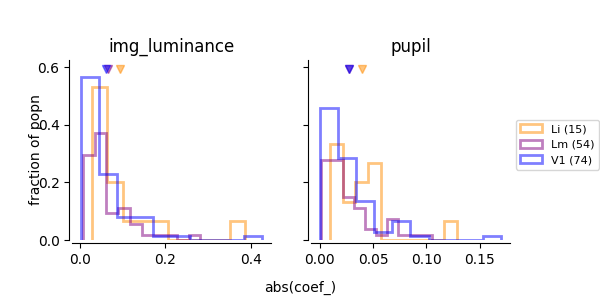

('/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/neural-types/regr_luminance-pupil', 'coef-distns_R2-0.10__regr-img_luminance-pupil')


In [57]:
cdf=False
fit_thr = 0.1

#regressor_names = ['RF_luminance', 'pupil']
fig = plot_coef_distns(regdfsimple, regressor_names, area_colors, cdf=cdf, fit_thr=fit_thr, sharex=False)

# Save
regr_str = '-'.join(regressor_names)
cdf_str ='-cdf' if cdf else ''
figname = 'coef-distns%s_R2-%.2f__regr-%s' % (cdf_str, fit_thr, regr_str)

dirstr = ['luminance']
dirstr.extend(regressor_names[1:])     
currdir = os.path.join(neuraltypes_dir, 'regr_%s' % '-'.join(dirstr))
if not os.path.exists(currdir):
    os.makedirs(currdir)
    
pl.savefig(os.path.join(currdir, '%s.svg' % figname))
pl.savefig(os.path.join(currdir, '_%s.png' % figname))
print(currdir, figname)

#### Test simple w/ image luminance

In [51]:
lumdfsimple = []

for (visual_area, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):
    datakey = '%s_%s_fov%i' % (session, animalid, fovnum)
    print(datakey)

    # OBJECT data and info
    mean_responses = DATA[datakey]['data'].copy()
    sdf = DATA[datakey]['sdf'].copy()
    rois_objects = mean_responses.columns.tolist()
    sizes = sorted(DATA[datakey]['sdf']['size'].unique())
    roi_list = [r for r in rois_objects if r != 'config']
    
    # Get luminance info for current session
    rf_exp = 'rfs' if 'rfs' in g['experiment'].values else 'rfs10'
    lumdf = get_mean_luminance(animalid, session, fov, expname=rf_exp, traceid=traceid,
                           response_type=response_type, fit_thr=fit_thr)

    ## Simple glm ---------------------------------------------------------------
    assert '%s_blobs' % datakey in PUPILDATA.keys(), "Datakey not found in PUPIL data: %s" % datakey
    pupilstats = PUPILDATA['%s_blobs' % datakey]

    # Only take subset of trials w/ data
    included_trial_nums = np.array(pupilstats['trial'].values)

    configs_on_included_trials = mean_responses['config'].loc[included_trial_nums].copy()
    print("... including %i out of %i trials for face data" % (len(included_trial_nums), mean_responses.shape[0]))
    pupil_sub = pupilstats[pupilstats['trial'].isin(included_trial_nums)]
    x1 = zscore_array(np.array(pupil_sub.sort_values(by='trial')['pupil'].values))
    x0 = zscore_array(np.array([float(lumdf[lumdf['config']==cfg]['luminance'])\
                                for cfg in configs_on_included_trials]))

    regressor_names = ['img_luminance', 'pupil'] #, 'snout'] # RF-lum always first
    regressor_placeholders = ['x%i' % i for i in np.arange(0, len(regressor_names))]

    ## Train and fit
    for rid in roi_list:

        # Get sample data
        Xs = pd.DataFrame(np.vstack([x0, x1]).T, columns=regressor_placeholders)
        ys = mean_responses[rid].loc[included_trial_nums].copy()

        # Split test set
        train_x, test_x, train_y, test_y = train_test_split(Xs, ys, train_size=0.8, test_size=0.2, random_state=0)      
        scaler = StandardScaler().fit(train_x.values)
        
        # Fit linear regression w/ ridge regularization
        ridge_regr = RidgeCV(normalize=False, cv=None, store_cv_values=True)

        ridge_regr.fit(scaler.transform(train_x), train_y)
        prediction = ridge_regr.predict(scaler.transform(test_x))
        R2_score = ridge_regr.score(scaler.transform(test_x), test_y)
        rmse = np.sqrt(skmetrics.mean_squared_error(test_y, prediction))

        #print("R2: %.2f, RMSE: %.2f" % (R2_score, rmse))

        coef_dict = dict(('x%i' % i, coef_val) for i, coef_val in enumerate(ridge_regr.coef_))
        coef_dict.update({'R2': R2_score, 
                          'RMSE': rmse,
                          'rid': rid,
                          'visual_area': visual_area,
                          'datakey': datakey})

        lumdfsimple.append(pd.DataFrame(coef_dict, index=[rid]))
        
lumdfsimple = pd.concat(lumdfsimple, axis=0)

20190605_JC090_fov1
[JC090] 20190605 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
getting screen info
checking res...
avg pix/deg: 16.05
... [JC090|20190605|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC090|20190605|FOV1_zoom2p0x] creating gratings object
GET ROI SET: rois001
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
Getting stimulus info for: combined_gratings_static
Stimuli presented at coords: (15, 0)
... [JC090|20190605|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC090|20190605|FOV1_zoom2p0x] creating rfs10 object
GET ROI SET: rois001
... getting data p

Stimuli presented at coords: (30, -5)
... [JC099|20190612|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC099|20190612|FOV1_zoom2p0x] creating rfs10 object
GET ROI SET: rois001
... getting data paths - name: rfs10
... renaming experiment to run name: combined_rfs10_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
9 images found for 9 objects
('Non image conditions:', [-1])
... including 1499 out of 1500 trials for face data
20190617_JC099_fov1
[JC099] 20190617 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
getting screen info
checking res...
avg pix/deg: 16.05
... [JC099|20190617|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combin

GET ROI SET: rois001
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
9 images found for 9 objects
('Non image conditions:', [-1])
... including 1500 out of 1500 trials for face data
20190513_JC078_fov1
[JC078] 20190513 - FOV1_zoom2p0x:  Getting anatomicals...
No anatomicals for current session: (JC078 | 20190513 | FOV1_zoom2p0x)
... Getting screen info
getting screen info
checking res...
avg pix/deg: 16.05
... [JC078|20190513|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC078|20190513|FOV1_zoom2p0x] creating gratings object
GET ROI SET: rois001
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
Getting stimulus info 

GET ROI SET: rois001
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
Getting stimulus info for: combined_gratings_static
Stimuli presented at coords: (20, 0)
... [JC084|20190525|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC084|20190525|FOV1_zoom2p0x] creating rfs object
GET ROI SET: rois001
... getting data paths - name: rfs
... renaming experiment to run name: combined_rfs_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
9 images found for 9 objects
('Non image conditions:', [-1])
... including 1500 out of 1500 trials for face data
20190627_JC091_fov1
[JC091] 20190627 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
getting screen info
checking res...
avg pix/d

... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC084|20190522|FOV1_zoom2p0x] creating gratings object
GET ROI SET: rois001
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
Getting stimulus info for: combined_gratings_static
Stimuli presented at coords: (20, -8)
... [JC084|20190522|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC084|20190522|FOV1_zoom2p0x] creating rfs object
GET ROI SET: rois001
... getting data paths - name: rfs
... renaming experiment to run name: combined_rfs_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
9 images found for 9 objects
('Non image conditions:', [-1])
... including 1469 out of 1500 trials for face data
2019062

In [52]:
print(regressor_names)

['img_luminance', 'pupil']


{'x0': 'img_luminance', 'x1': 'pupil'}


<IPython.core.display.Javascript object>


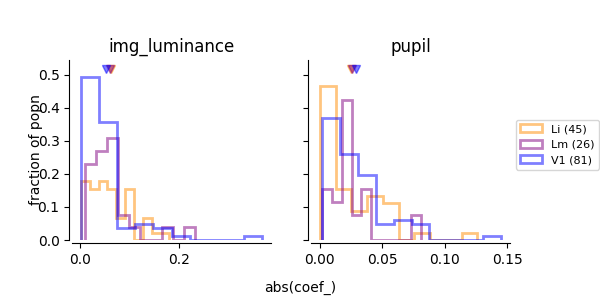

('/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/neural-types/regr_luminance-pupil', 'coef-distns_R2-0.10__regr-img_luminance-pupil')


In [56]:
cdf=False
fit_thr = 0.1

#regressor_names = ['img_luminance', 'pupil']
fig = plot_coef_distns(lumdfsimple, regressor_names, area_colors, cdf=cdf, fit_thr=fit_thr, sharex=False)

# Save
regr_str = '-'.join(regressor_names)
cdf_str ='-cdf' if cdf else ''
figname = 'coef-distns%s_R2-%.2f__regr-%s' % (cdf_str, fit_thr, regr_str)

dirstr = ['luminance']
dirstr.extend(regressor_names[1:])     
currdir = os.path.join(neuraltypes_dir, 'regr_%s' % '-'.join(dirstr))
if not os.path.exists(currdir):
    os.makedirs(currdir)
    
pl.savefig(os.path.join(currdir, '%s.svg' % figname))
pl.savefig(os.path.join(currdir, '_%s.png' % figname))
print(currdir, figname)

## Simple GLM: luminance- and luminance-related vs. stimulus
Regressors:  RF-luminance, size, pupil, binary-stimulus (fullscreen-control or image)

In [59]:
stim_type = 'shape'

regcoefs = []
for (visual_area, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):
    
    datakey = '%s_%s_fov%i' % (session, animalid, fovnum)
    print(datakey)

    # OBJECT data and info
    mean_responses = DATA[datakey]['data'].copy()
    sdf = DATA[datakey]['sdf'].copy()
    rois_objects = mean_responses.columns.tolist()
    sizes = sorted(DATA[datakey]['sdf']['size'].unique())

    # RF data and info
    rf_keys = [k for k in RFDATA.keys() if datakey in k]
    if any('rfs10' in r for r in rf_keys):
        rf_key = '%s_rfs10' % datakey
    else:
        rf_key = '%s_rfs' % datakey
    rf_luminances = RFDATA[rf_key].copy()
    rf_cfgs=[]
    for sz, mp in zip(rf_luminances['size'], rf_luminances['object']):
        morphlevel = -1 if mp=='fullscreen' else int(mp[1:])
        curr_config = sdf[(sdf['size']==sz) & (sdf['morphlevel']==morphlevel)].index.tolist()[0]
        rf_cfgs.append(curr_config)
    rf_luminances['config'] = rf_cfgs

    rois_rfs = sorted(rf_luminances['rid'].unique())

    # Get ROIs for both
    print("Blobs: %i, RFs: %i" % (len(rois_objects), len(rois_rfs)))
    roi_list = np.intersect1d(rois_objects, rois_rfs)
    roi_list = [int(i) for i in roi_list]
    print("%i rois common to both." % len(roi_list))
    
    ## Simple glm ---------------------------------------------------------------
    assert '%s_blobs' % datakey in PUPILDATA.keys(), "Datakey not found in PUPIL data: %s" % datakey
    pupilstats = PUPILDATA['%s_blobs' % datakey]
    #assert '%s_blobs' % datakey in SNOUTDATA.keys(), "Datakey not found in SNOUT data: %s" % datakey
    #snoutstats = SNOUTDATA['%s_blobs' % datakey]

    # Only take subset of trials w/ data
    included_trial_nums = np.array(pupilstats['trial'].values)
    #included_trial_nums2 = np.array(snoutstats['trial'].values)
    #included_trial_nums = np.intersect1d(included_trial_nums1, included_trial_nums2)

    configs_on_included_trials = mean_responses['config'].loc[included_trial_nums].copy()
    print("... including %i out of %i trials for face data" % (len(included_trial_nums), mean_responses.shape[0]))
    x1 = zscore_array(np.array([sdf['size'][cfg] for cfg in configs_on_included_trials]))
    if stim_type == 'morphlevel':
        x2 = zscore_array(np.array([sdf['morphlevel'][cfg] for cfg in configs_on_included_trials]))
    elif stim_type == 'shape':
        x2 = zscore_array(np.array([1 if sdf['morphlevel'][cfg]!=-1 else 0 for cfg in configs_on_included_trials]))

    pupil_sub = pupilstats[pupilstats['trial'].isin(included_trial_nums)]
    #snout_sub = snoutstats[snoutstats['trial'].isin(included_trial_nums)]

    x3 = zscore_array(np.array(pupil_sub.sort_values(by='trial')['pupil'].values))
    #x4 = zscore_array(np.array(snout_sub.sort_values(by='trial')['snout'].values))

    regressor_names = ['RF_luminance', 'size', stim_type, 'pupil'] #, 'snout'] # RF-lum always first

    #x1.shape, x2.shape, x3.shape, x4.shape

 
    ## Train and fit ---------------------------------------------------------------
    for rid in roi_list:   

        # Only select trials with pupil dataa
        meanr = mean_responses[[rid, 'config']].loc[included_trial_nums].copy()

        # Get sample data
        Xs, ys = get_sample_data(rid, rf_luminances, meanr, x1, x2, x3) #, x4)

        # Split test set
        train_x, test_x, train_y, test_y = train_test_split(Xs, ys, train_size=0.8, test_size=0.2, random_state=0)      
        scaler = StandardScaler().fit(train_x.values)

        # Fit linear regression w/ ridge regularization
        ridge_regr = RidgeCV(normalize=False, cv=None, store_cv_values=True)

        ridge_regr.fit(scaler.transform(train_x), train_y)
        prediction = ridge_regr.predict(scaler.transform(test_x))
        R2_score = ridge_regr.score(scaler.transform(test_x), test_y)
        mse = skmetrics.mean_squared_error(test_y, prediction)

        coef_dict = dict(('x%i' % i, coef_val) for i, coef_val in enumerate(ridge_regr.coef_))
        coef_dict.update({'R2': R2_score, 
                          'MSE': mse,
                          'rid': rid,
                          'visual_area': visual_area,
                          'datakey': datakey})

        regcoefs.append(pd.DataFrame(coef_dict, index=[rid]))


    #     predictions[rid] = {'predicted': prediction,
    #                         'test_y': test_y,
    #                         'train_y': train_y,
    #                         'train_x': train_x,
    #                         'test_x': test_x}

regdf = pd.concat(regcoefs, axis=0).reset_index(drop=True)


20190605_JC090_fov1
Blobs: 142, RFs: 33
20 rois common to both.
... including 1615 out of 1635 trials for face data
20190602_JC091_fov1
Blobs: 162, RFs: 105
70 rois common to both.
... including 702 out of 1499 trials for face data
20190606_JC091_fov1
Blobs: 111, RFs: 65
25 rois common to both.
... including 801 out of 1625 trials for face data
20190607_JC091_fov1
Blobs: 134, RFs: 115
41 rois common to both.
... including 1060 out of 1500 trials for face data
20190614_JC091_fov1
Blobs: 123, RFs: 125
55 rois common to both.
... including 1469 out of 1500 trials for face data
20190609_JC099_fov1
Blobs: 63, RFs: 70
28 rois common to both.
... including 1423 out of 1500 trials for face data
20190612_JC099_fov1
Blobs: 65, RFs: 73
25 rois common to both.
... including 1499 out of 1500 trials for face data
20190617_JC099_fov1
Blobs: 10, RFs: 30
3 rois common to both.
... including 972 out of 973 trials for face data
20191018_JC113_fov1
Blobs: 60, RFs: 37
8 rois common to both.
... including 2

In [60]:
fit_thr = 0.1
regdf[regdf['R2']>=fit_thr].groupby(['visual_area']).count()


,MSE,R2,datakey,rid,x0,x1,x2,x3
visual_area,,,,,,,,
Li,33,33,33,33,33,33,33,33
Lm,122,122,122,122,122,122,122,122
V1,197,197,197,197,197,197,197,197


#### Look at distribution of coefficients by visual area

['RF_luminance', 'size', 'shape', 'pupil']
{'x2': 'shape', 'x3': 'pupil', 'x0': 'RF_luminance', 'x1': 'size'}


<IPython.core.display.Javascript object>


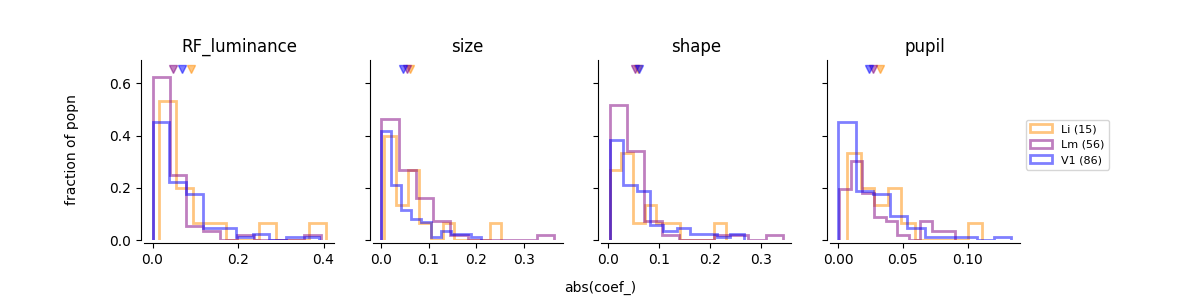

('/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/neural-types/regr_luminance-size-shape-pupil', 'coef-distns_R2-0.15__regr-RF_luminance-size-shape-pupil')


In [88]:
cdf=False
fit_thr = 0.15

print(regressor_names)
regressor_names = ['RF_luminance', 'size', 'shape', 'pupil'] #, 'snout'] # RF-lum always first
fig = plot_coef_distns(regdf, regressor_names, area_colors, cdf=cdf, fit_thr=fit_thr, sharex=False)

# Save
regr_str = '-'.join(regressor_names)
cdf_str ='-cdf' if cdf else ''
figname = 'coef-distns%s_R2-%.2f__regr-%s' % (cdf_str, fit_thr, regr_str)

dirstr = ['luminance']
dirstr.extend(regressor_names[1:])     
currdir = os.path.join(neuraltypes_dir, 'regr_%s' % '-'.join(dirstr))
if not os.path.exists(currdir):
    os.makedirs(currdir)
    
pl.savefig(os.path.join(currdir, '%s.svg' % figname))
pl.savefig(os.path.join(currdir, '_%s.png' % figname))
print(currdir, figname)

In [78]:
fit_thr

0.1

In [75]:


rf_counts = pd.DataFrame({'fraction_fit': [float(len(g[g['R2']>=fit_thr])) / len(g['R2']) \
                               for visual_area, g in regdf.groupby(['visual_area'])],
                      'n_total': [len(g['R2']) for visual_area, g in regdf.groupby(['visual_area'])],
                      'visual_area': [visual_area for visual_area, g in regdf.groupby(['visual_area'])]})

im_counts = pd.DataFrame({'fraction_fit': [float(len(g[g['R2']>=fit_thr])) / len(g['R2']) \
                               for visual_area, g in lumcoefs.groupby(['visual_area'])],
                      'n_total': [len(g['R2']) for visual_area, g in lumcoefs.groupby(['visual_area'])],
                      'visual_area': [visual_area for visual_area, g in lumcoefs.groupby(['visual_area'])]})

In [76]:
im_counts

,fraction_fit,n_total,visual_area
0,0.138593,938,Li
1,0.187215,1095,Lm
2,0.223355,1079,V1


In [77]:
rf_counts

,fraction_fit,n_total,visual_area
0,0.116608,283,Li
1,0.198374,615,Lm
2,0.257180,766,V1


In [706]:
if not os.path.exists(os.path.join(neuraltypes_dir, 'pngs')):
    os.makedirs(os.path.join(neuraltypes_dir, 'pngs'))

## Bootstrap

In [95]:
from matplotlib.lines import Line2D
stim_type='shape'

In [107]:
luminance_type='img'
simple=False
fit_thr = 0.2

if luminance_type == 'RF':
    if simple:
        currdf = regdfsimple.copy()
        regressor_names = ['%s_luminance' % luminance_type, 'pupil']
    else:
        currdf = regdf.copy()
        regressor_names = ['%s_luminance' % luminance_type, 'size', stim_type, 'pupil']
else:
    if simple:
        currdf = lumdfsimple.copy()
        regressor_names = ['%s_luminance' % luminance_type, 'pupil']
    else:
        lumcoefs.copy()
        regressor_names = ['%s_luminance' % luminance_type, 'size', stim_type, 'pupil']

glm_vars = ['x%i' % i for i in np.arange(0, len(regressor_names))]
regressor_mapping = dict((x, n) for x, n in zip(glm_vars, regressor_names))
print(regressor_mapping)

{'x2': 'shape', 'x3': 'pupil', 'x0': 'img_luminance', 'x1': 'size'}


In [108]:
counts_by_area = dict(currdf[currdf['R2']>=fit_thr].groupby(['visual_area'])['rid'].count())
pp.pprint(counts_by_area)

area_means = pd.DataFrame(np.vstack([currdf[ (currdf['R2']>=fit_thr) & (currdf['visual_area']==vis) ][glm_vars].abs().mean() \
                        for vis in visual_areas]), columns=glm_vars, index=visual_areas)
area_means
#pp.pprint(area_means)

{   'Li': 9, 'Lm': 28, 'V1': 42}


,x0,x1,x2,x3
V1,0.085059,0.048615,0.075104,0.028093
Lm,0.063082,0.067262,0.064907,0.028492
Li,0.116360,0.066484,0.078258,0.038485


In [109]:
ci = 0.95
n_iters = 10000
combined_df = currdf[(currdf['R2']>=fit_thr) & (currdf['visual_area'].isin(['V1', 'Lm', 'Li']))].copy()


In [110]:
visual_area = 'Li'
n_samples = counts_by_area[visual_area]

bootdf = pd.DataFrame(np.vstack([combined_df[glm_vars].sample(n=n_samples, replace=True).abs().mean()\
                   for _ in np.arange(0, n_iters)]), columns=glm_vars)

low_ix = int(round(n_iters * (1-.95)/2.))
high_ix = int(round(n_iters * (1-(1-.95)/2.)))


<IPython.core.display.Javascript object>


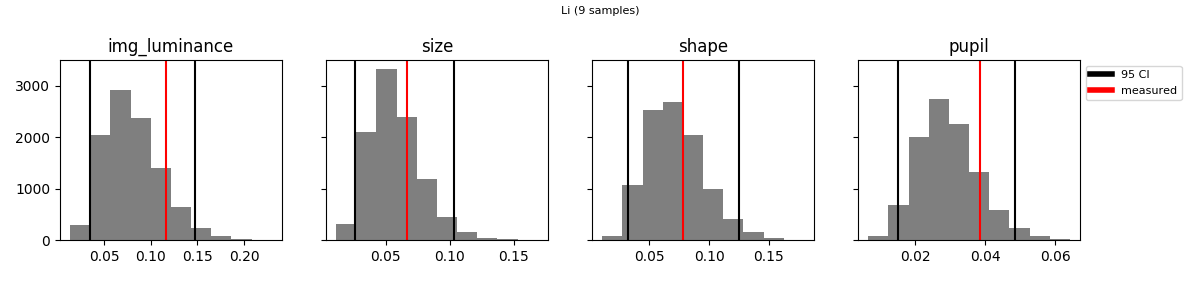

('/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/neural-types/regr_luminance-size-shape-pupil', 'boot-img-lum_10000-iters_match-N-Li_all-areas')


In [111]:
legend_elements = [Line2D([0], [0], color='k', lw=4, label='%i CI' % (ci*100) ),
                   Line2D([0], [0], color='r', lw=4, label='measured')]

fig, axes = pl.subplots(1, len(glm_vars), figsize=(len(regressor_names)*3, 3), sharey=True, sharex=False)
fig.patch.set_alpha(1)
for ax, gvar in zip(axes.flat, glm_vars):
    
    # Get 95% CI
    sorted_vals = sorted(bootdf[gvar])
    p_lower = sorted_vals[low_ix]
    p_higher = sorted_vals[high_ix]

    ax.hist(bootdf[gvar], color='k', alpha=0.5)
    ax.axvline(x=area_means[gvar][visual_area], color='r')
    
    ax.axvline(x=p_lower, color='k')
    ax.axvline(x=p_higher, color='k')
    
    ax.set_title(regressor_mapping[gvar])

ax.legend(handles=legend_elements, bbox_to_anchor=(1,1), fontsize=8)
pl.subplots_adjust(left=0.05, bottom=0.2, top=0.8, wspace=0.2)
pl.suptitle('%s (%i samples)' % (visual_area, n_samples), fontsize=8)

figname = 'boot-%s-lum_%i-iters_match-N-%s_all-areas' % (luminance_type, n_iters, visual_area)


# Save

dirstr = ['luminance']
dirstr.extend(regressor_names[1:])     
currdir = os.path.join(neuraltypes_dir, 'regr_%s' % '-'.join(dirstr))
if not os.path.exists(currdir):
    os.makedirs(currdir)
    
pl.savefig(os.path.join(currdir, '%s.svg' % figname))
pl.savefig(os.path.join(currdir, '_%s.png' % figname))
print(currdir, figname)

## Use actual luminance of image (on screen) instead of "RF-luminance"

In [64]:
from pipeline.python.classifications import rf_utils as rfutils

In [65]:
stim_type = 'shape'

lumcoefs = []
for (visual_area, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):
    datakey = '%s_%s_fov%i' % (session, animalid, fovnum)
    print(datakey)

    # OBJECT data and info
    mean_responses = DATA[datakey]['data'].copy()
    sdf = DATA[datakey]['sdf'].copy()
    rois_objects = mean_responses.columns.tolist()
    sizes = sorted(DATA[datakey]['sdf']['size'].unique())
    roi_list = [r for r in rois_objects if r != 'config']
    
    # Get luminance info for current session
    rf_exp = 'rfs10' if 'rfs10' in g['experiment'].values else 'rfs'
    lumdf = get_mean_luminance(animalid, session, fov, expname=rf_exp, traceid=traceid,
                           response_type=response_type, fit_thr=fit_thr)

    ## Simple glm ---------------------------------------------------------------
    assert '%s_blobs' % datakey in PUPILDATA.keys(), "Datakey not found in PUPIL data: %s" % datakey
    pupilstats = PUPILDATA['%s_blobs' % datakey]
    #assert '%s_blobs' % datakey in SNOUTDATA.keys(), "Datakey not found in SNOUT data: %s" % datakey
    #snoutstats = SNOUTDATA['%s_blobs' % datakey]

    # Only take subset of trials w/ data
    included_trial_nums = np.array(pupilstats['trial'].values)
    #included_trial_nums2 = np.array(snoutstats['trial'].values)
    #included_trial_nums = np.intersect1d(included_trial_nums1, included_trial_nums2)

    configs_on_included_trials = mean_responses['config'].loc[included_trial_nums].copy()
    print("... including %i out of %i trials for face data" % (len(included_trial_nums), mean_responses.shape[0]))
    x1 = zscore_array(np.array([sdf['size'][cfg] for cfg in configs_on_included_trials]))
    if stim_type=='morphlevel':
        x2 = zscore_array(np.array([sdf['morphlevel'][cfg] for cfg in configs_on_included_trials]))
    elif stim_type == 'shape':
        x2 = zscore_array(np.array([1 if sdf['morphlevel'][cfg]!=-1 else 0 for cfg in configs_on_included_trials]))

    pupil_sub = pupilstats[pupilstats['trial'].isin(included_trial_nums)]
    #snout_sub = snoutstats[snoutstats['trial'].isin(included_trial_nums)]

    x3 = zscore_array(np.array(pupil_sub.sort_values(by='trial')['pupil'].values))
    #x4 = zscore_array(np.array(snout_sub.sort_values(by='trial')['snout'].values))

    x0 = zscore_array(np.array([float(lumdf[lumdf['config']==cfg]['luminance'])\
                                for cfg in configs_on_included_trials]))

    regressor_names = ['img_luminance', 'size', stim_type, 'pupil'] #, 'snout'] # RF-lum always first
    regressor_placeholders = ['x%i' % i for i in np.arange(0, len(regressor_names))]

    ## Train and fit
    for rid in roi_list:

        # Get sample data
        Xs = pd.DataFrame(np.vstack([x0, x1, x2, x3]).T, columns=regressor_placeholders)
        #Xs = pd.DataFrame(np.vstack([x0, x1, x2]).T, columns=regressor_placeholders)
        ys = mean_responses[rid].loc[included_trial_nums].copy()

        # Split test set
        train_x, test_x, train_y, test_y = train_test_split(Xs, ys, train_size=0.8, test_size=0.2, random_state=0)      
        scaler = StandardScaler().fit(train_x.values)
        
        # Fit linear regression w/ ridge regularization
        ridge_regr = RidgeCV(normalize=False, cv=None, store_cv_values=True)

        ridge_regr.fit(scaler.transform(train_x), train_y)
        prediction = ridge_regr.predict(scaler.transform(test_x))
        R2_score = ridge_regr.score(scaler.transform(test_x), test_y)
        rmse = np.sqrt(skmetrics.mean_squared_error(test_y, prediction))

        #print("R2: %.2f, RMSE: %.2f" % (R2_score, rmse))

        coef_dict = dict(('x%i' % i, coef_val) for i, coef_val in enumerate(ridge_regr.coef_))
        coef_dict.update({'R2': R2_score, 
                          'RMSE': rmse,
                          'rid': rid,
                          'visual_area': visual_area,
                          'datakey': datakey})

        lumcoefs.append(pd.DataFrame(coef_dict, index=[rid]))
        
lumcoefs = pd.concat(lumcoefs, axis=0)


20190605_JC090_fov1
[JC090] 20190605 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
getting screen info
checking res...
avg pix/deg: 16.05
... [JC090|20190605|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC090|20190605|FOV1_zoom2p0x] creating gratings object
GET ROI SET: rois001
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
Getting stimulus info for: combined_gratings_static
Stimuli presented at coords: (15, 0)
... [JC090|20190605|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC090|20190605|FOV1_zoom2p0x] creating rfs10 object
GET ROI SET: rois001
... getting data p

GET ROI SET: rois001
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
Getting stimulus info for: combined_gratings_static
Stimuli presented at coords: (30, -5)
... [JC099|20190612|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC099|20190612|FOV1_zoom2p0x] creating rfs10 object
GET ROI SET: rois001
... getting data paths - name: rfs10
... renaming experiment to run name: combined_rfs10_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
9 images found for 9 objects
('Non image conditions:', [-1])
... including 1499 out of 1500 trials for face data
20190617_JC099_fov1
[JC099] 20190617 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
getting screen info
checking res...
av

... including 1500 out of 1500 trials for face data
20190509_JC078_fov1
[JC078] 20190509 - FOV1_zoom2p0x:  Getting anatomicals...
No anatomicals for current session: (JC078 | 20190509 | FOV1_zoom2p0x)
... Getting screen info
getting screen info
checking res...
avg pix/deg: 16.05
... [JC078|20190509|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
[JC078|20190509] No experiment exists for: gratings
Stimuli presented at coords: (30, 8)
... [JC078|20190509|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC078|20190509|FOV1_zoom2p0x] creating gratings object
GET ROI SET: rois001
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
..

... renaming experiment to run name: combined_rfs_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
9 images found for 9 objects
('Non image conditions:', [-1])
... including 1237 out of 1250 trials for face data
20190525_JC084_fov1
[JC084] 20190525 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
getting screen info
checking res...
avg pix/deg: 16.05
... [JC084|20190525|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC084|20190525|FOV1_zoom2p0x] creating gratings object
GET ROI SET: rois001
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
Getting stimulus info for: combined_gratings_static
Stimuli presented at coords: (20, 0)
... [JC084|20190525|FOV1_zoom2p0x] creati

... renaming experiment to run name: combined_rfs_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
9 images found for 9 objects
('Non image conditions:', [-1])
... including 1492 out of 1500 trials for face data
20190522_JC084_fov1
[JC084] 20190522 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
getting screen info
checking res...
avg pix/deg: 16.05
... [JC084|20190522|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC084|20190522|FOV1_zoom2p0x] creating gratings object
GET ROI SET: rois001
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
Getting stimulus info for: combined_gratings_static
Stimuli presented at coords: (20, -8)
... [JC084|20190522|FOV1_zoom2p0x] creat

In [1135]:
lumcoefs.groupby(['visual_area']).count()

,R2,RMSE,datakey,rid,x0,x1,x2,x3
visual_area,,,,,,,,
Li,938,938,938,938,938,938,938,938
Lm,1095,1095,1095,1095,1095,1095,1095,1095
V1,1079,1079,1079,1079,1079,1079,1079,1079


In [1137]:
fit_thr = 0.1
lumcoefs[lumcoefs['R2']>=fit_thr].groupby(['visual_area']).count()

,R2,RMSE,datakey,rid,x0,x1,x2,x3
visual_area,,,,,,,,
Li,109,109,109,109,109,109,109,109
Lm,178,178,178,178,178,178,178,178
V1,218,218,218,218,218,218,218,218


## Distribution of R2

In [1138]:
print(regressor_names)

['img_luminance', 'size', 'shape', 'pupil']


In [73]:
glm_vars = ['x%i' % i for i in np.arange(0, len(regressor_names))]

<IPython.core.display.Javascript object>


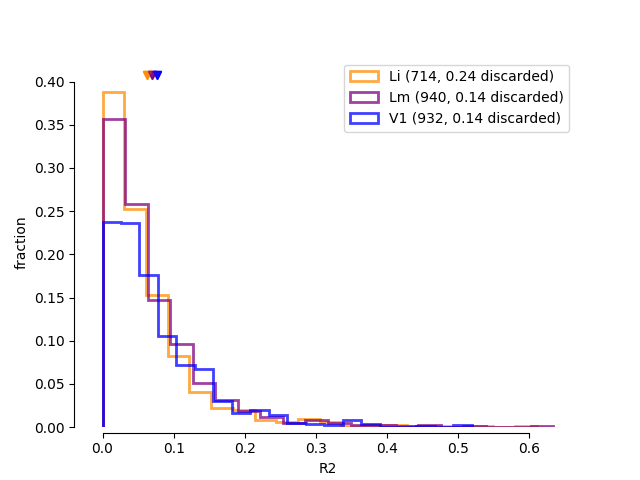

('/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/neural-types/regr_luminance-size-shape-pupil', 'R2-distns__regr-img_luminance-size-shape-pupil')


In [74]:
cdf=False

fig, ax = pl.subplots(1) #, 3)
xmax=[]
ai = 0
for visual_area, g in lumcoefs.groupby(['visual_area']):
    #ax = axes[ai]
    n_total = float(g.shape[0])
    neg_R2 = g[g['R2'] <= 0]['R2']
    R2_vals = g[g['R2'] > 0]['R2']
    
    values = abs(R2_vals)
    weights = np.ones_like(values)/float(len(values))
    ax.hist(values, 
            cumulative=cdf,
            label='%s (%i, %.2f discarded)' % (visual_area, len(values), len(neg_R2)/n_total),
            color=area_colors[visual_area],
            histtype='step', alpha=0.75, lw=2,
            normed=0, weights=weights, bins=20)
    #sns.distplot(values, color=area_colors[visual_area])
    ai += 1
    #ax.set_title(visual_area)
    

# Draw means
mean_marker = 'v'
curr_ymax = ax.get_ylim()[-1]
for ai, param in enumerate(glm_vars):
    #ax = axes[ai]
    for visual_area, g in lumcoefs[lumcoefs['R2']>0].groupby(['visual_area']):
        mean_val = abs(g['R2'].values).mean()
        ax.plot(mean_val, curr_ymax, marker=mean_marker, color=area_colors[visual_area],
               alpha=0.5)
ax.legend(bbox_to_anchor=(1.0, 0.7), fontsize=8)
ax.set_xlabel('R2')
ax.set_ylabel('fraction')
sns.despine(trim=True, offset=4)
pl.legend()

# Save
regr_str = '-'.join(regressor_names)
cdf_str ='-cdf' if cdf else ''
figname = 'R2-distns%s__regr-%s' % (cdf_str, regr_str)

dirstr = ['luminance']
dirstr.extend(regressor_names[1:])     
currdir = os.path.join(neuraltypes_dir, 'regr_%s' % '-'.join(dirstr))
if not os.path.exists(currdir):
    os.makedirs(currdir)
    
pl.savefig(os.path.join(currdir, '%s.svg' % figname))
pl.savefig(os.path.join(currdir, '_%s.png' % figname))
print(currdir, figname)

#### What fraction is worse.better?

In [1133]:
S1 = frac_by_session.copy()


In [67]:
summaries = []
fit_thr = 0.1
i= 0
for (visual_area, datakey), g in lumcoefs.groupby(['visual_area', 'datakey']):
    #ax = axes[ai]
    n_total = float(g.shape[0])
    #neg_R2 = g[g['R2'] <= 0]['R2']
    R2_vals = g[g['R2'] > 0]['R2']
    pass_vals = g[g['R2'] >= fit_thr]['R2']

    summaries.append( pd.DataFrame({'total': float(g.shape[0]),
                                     'n_included': float(len(R2_vals)),
                                     'n_above_thr': float(len(pass_vals)),
                                     'visual_area': visual_area,
                                     'datakey': datakey}, index=[i]) )
    i += 1
                
                           
    
        

In [68]:
summaries = pd.concat(summaries, axis=0)

In [69]:
frac_by_session = []
for visual_area, g in summaries.groupby(['visual_area']):
    fractions = g['n_above_thr'] / g['n_included']
    
    frac_by_session.append(pd.DataFrame({'visual_area': [visual_area for _ in np.arange(0, len(fractions))],
                                             'fraction': fractions})) 
S2 = pd.concat(frac_by_session, axis=0)

<IPython.core.display.Javascript object>


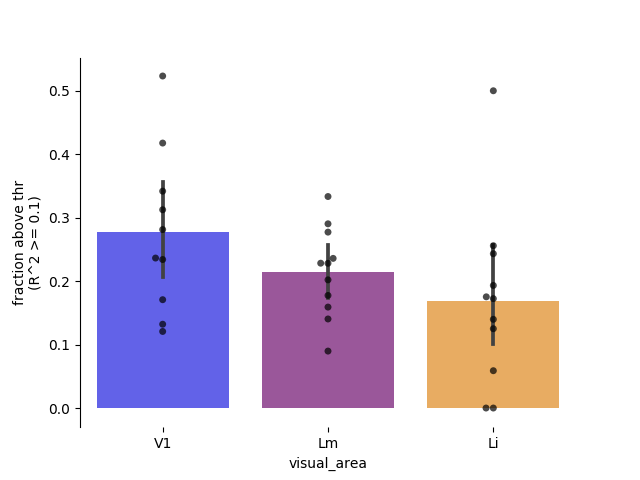

('/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/neural-types/regr_luminance-size-shape-pupil', 'R2-fractions-above-thr__regr-img_luminance-size-shape-pupil')


In [70]:
fig, ax = pl.subplots()
ax = sns.barplot(x='visual_area', y='fraction', data=S2, alpha=0.7, #edgecolor='k',
            palette=area_colors, order=visual_areas) #, order=visual_areas, alpha=0.7)
ax = sns.swarmplot(x='visual_area', y='fraction', data=S2, #kind='swarm', #alpha=0.7,
            color='k', order=visual_areas, alpha=0.7)

ax.set_ylabel('fraction above thr\n(R^2 >= 0.1)')
#ax.set_xticks([])
sns.despine(bottom=True)


# Save
regr_str = '-'.join(regressor_names)
cdf_str ='-cdf' if cdf else ''
figname = 'R2-fractions-above-thr__regr-%s' % (regr_str)

dirstr = ['luminance']
dirstr.extend(regressor_names[1:])     
currdir = os.path.join(neuraltypes_dir, 'regr_%s' % '-'.join(dirstr))
if not os.path.exists(currdir):
    os.makedirs(currdir)
    
pl.savefig(os.path.join(currdir, '%s.svg' % figname))
pl.savefig(os.path.join(currdir, '_%s.png' % figname))
print(currdir, figname)

#### Plot lum regressors

['img_luminance', 'size', 'shape', 'pupil']
{'x2': 'shape', 'x3': 'pupil', 'x0': 'img_luminance', 'x1': 'size'}


<IPython.core.display.Javascript object>


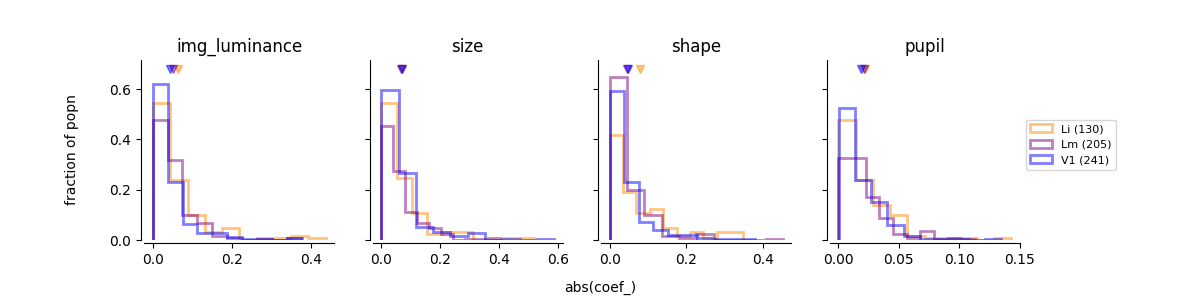

('/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/neural-types/regr_luminance-size-shape-pupil', 'coef-distns_R2-0.10__regr-img_luminance-size-shape-pupil')


In [66]:
cdf=False
fit_thr = 0.1

print(regressor_names)
#regressor_names = ['img_luminance', 'size', 'shape', 'pupil'] #, 'snout'] # RF-lum always first
fig = plot_coef_distns(lumcoefs, regressor_names, area_colors, cdf=cdf, fit_thr=fit_thr, sharex=False)

# Save
regr_str = '-'.join(regressor_names)
cdf_str ='-cdf' if cdf else ''
figname = 'coef-distns%s_R2-%.2f__regr-%s' % (cdf_str, fit_thr, regr_str)

dirstr = ['luminance']
dirstr.extend(regressor_names[1:])     
currdir = os.path.join(neuraltypes_dir, 'regr_%s' % '-'.join(dirstr))
if not os.path.exists(currdir):
    os.makedirs(currdir)
    
pl.savefig(os.path.join(currdir, '%s.svg' % figname))
pl.savefig(os.path.join(currdir, '_%s.png' % figname))
print(currdir, figname)

## Are some vars correlated

In [245]:
for visual_area, g in regdf[regdf['R2']>=fit_thr].groupby(['visual_area']):
    g

<IPython.core.display.Javascript object>


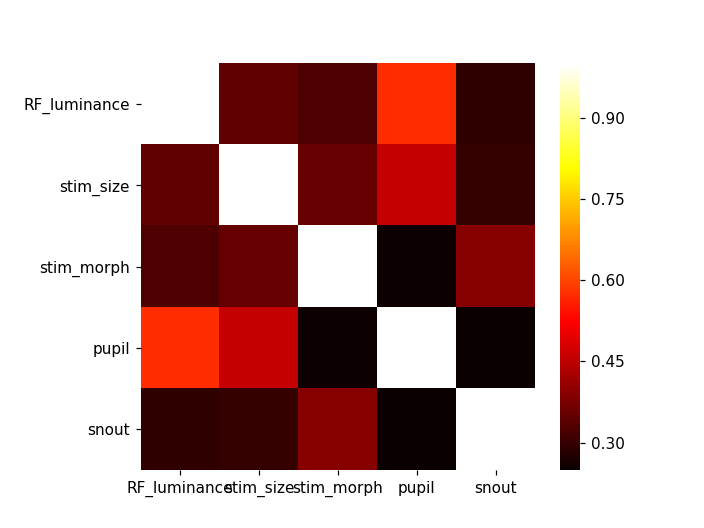

In [538]:
fig, ax = pl.subplots()
rcorr = g[regressor_placeholders].abs().corr()
sns.heatmap(rcorr, ax=ax, cmap='hot')
ax.set_yticklabels([regressor_mapping[ri] for ri in rcorr.columns.tolist()], rotation=0)
ax.set_xticklabels([regressor_mapping[ri] for ri in rcorr.columns.tolist()], rotation=0)

pl.subplots_adjust(left=0.2)

## check fit

In [269]:
animalid = 'JC084'
session = '20190522'
fovnum = 1

In [279]:
from pipeline.python.classifications import rf_utils as rfutils

In [280]:
images = rfutils.load_image_stimuli()


9 images found for 9 objects


In [284]:
image_list = sorted(images.keys(), key=natural_keys)
[images[imname].mean() for imname in image_list]

[80.794944863957809,
 76.243683327340278,
 71.552427184466026,
 66.985116265132447,
 63.961461704422867,
 61.639575092892244,
 59.685967277957566,
 58.768617403811575,
 58.111704422869472]

In [288]:
dsets[ (dsets['animalid']==animalid) & (dsets['session']==session) ]

,animalid,experiment,fov,session,visual_area,fovnum
0,JC084,rfs,FOV1_zoom2p0x,20190522,V1,1
1,JC084,gratings,FOV1_zoom2p0x,20190522,V1,1
2,JC084,blobs,FOV1_zoom2p0x,20190522,V1,1
3,JC084,retino,FOV1_zoom2p0x,20190522,V1,1


In [336]:
dsets[dsets['experiment']=='blobs'].groupby(['visual_area']).count()

,animalid,experiment,fov,session,fovnum
visual_area,,,,,
Li,11,11,11,11,11
Lm,11,11,11,11,11
V1,10,10,10,10,10


##### Get luminance of actual images

#### Calculate luminance as average across screen


In [426]:
analysisroot = '/n/coxfs01/julianarhee'
stim_outdir = os.path.join(analysisroot, 'stimulus-info')
if not os.path.exists(stim_outdir):
    os.makedirs(stim_outdir)
print(stim_outdir)

/n/coxfs01/julianarhee/stimulus-info


In [858]:
animalid = 'JC084'
session = '20190522'
fov = 'FOV1_zoom2p0x'

In [ ]:
lumdf = get_mean_luminance(animalid, session, fov, traceid=traceid,
                       response_type=response_type, fit_thr=fit_thr)

In [386]:

images = rfutils.load_image_stimuli()
all_conditions = sorted(sdf['morphlevel'].unique())
nonimage_conditions = [i for i in all_conditions if 'M%i' % i not in image_list]
print("Non image conditions:", nonimage_conditions)
image_list = sorted(images.keys(), key=natural_keys)
image_list.extend(nonimage_conditions)

n_images = len(image_list)
cmap = 'Reds'
hue_colors = sns.color_palette(cmap, n_colors=n_images)
hue_colors[-1] = (0, 0, 0)
new_colors = sns.color_palette(cmap, n_colors=n_images-1)
hue_colors[0:-1] = new_colors
imlist = sorted([obj for obj, g in lumdf.groupby(['object'])], key=natural_keys)
morph_colors = dict((m, v) for m, v in zip(imlist, hue_colors))

sz_colors = sns.color_palette('Blues', n_colors=len(sizes))
size_colors = dict((m, v) for m, v in zip(sizes, sz_colors))

<IPython.core.display.Javascript object>


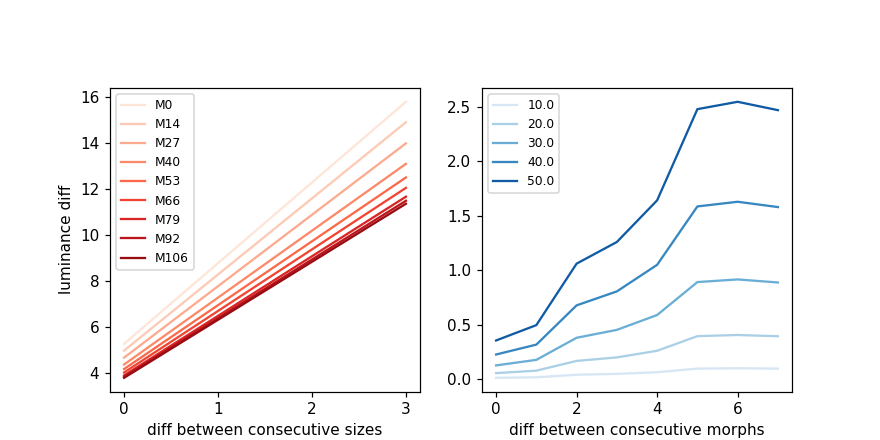

4       M0
9      M14
14     M27
19     M40
24     M53
29     M66
34     M79
39     M92
44    M106
Name: object, dtype: object


In [734]:
fig, axes = pl.subplots(1, 2, figsize=(8, 4))
fig.patch.set_alpha(1)
ax = axes[0]
for obj in imlist:
    if obj=='M-1':
        continue
    g = lumdf[lumdf['object']==obj]
    diff_vals = np.diff(g['luminance'])
    ax.plot(diff_vals, color=morph_colors[obj], label=obj)
ax.set_xlabel('diff between consecutive sizes')
ax.legend(fontsize=8)
ax.set_ylabel('luminance diff')
#ax.grid(True)

ax = axes[1]
actual_images = [i for i in imlist if i != 'M-1']
for sz in sizes:
    g = lumdf[(lumdf['size']==sz) & (lumdf['object'].isin(actual_images))]
    diff_vals = np.diff(g['luminance'][::-1])

    ax.plot((diff_vals), color=size_colors[sz], label=sz)
ax.set_xlabel('diff between consecutive morphs')
ax.legend(fontsize=8)
#ax.grid(True)
print(g['object'])

pl.subplots_adjust(top=0.8, wspace=0.2)

pl.savefig(os.path.join(stim_outdir, 'difference_bw_consecutive_images.svg'))
pl.savefig(os.path.join(stim_outdir, 'difference_bw_consecutive_images.png'))


#### Average difference between vs. across morphs

In [735]:
morph_diffs=[]
morph_stds = []
for obj in imlist:
    if obj=='M-1':
        continue
    g = lumdf[lumdf['object']==obj]
    diff_vals = np.diff(g['luminance'])
    morph_diffs.append(diff_vals.mean())
    morph_stds.append(diff_vals.std())

size_diffs=[]
size_stds=[]
actual_images = [i for i in imlist if i != 'M-1']
for sz in sizes:
    g = lumdf[(lumdf['size']==sz) & (lumdf['object'].isin(actual_images))]
    diff_vals = np.diff(g['luminance'][::-1])
    size_diffs.append(diff_vals.mean())
    size_stds.append(diff_vals.std())


<IPython.core.display.Javascript object>


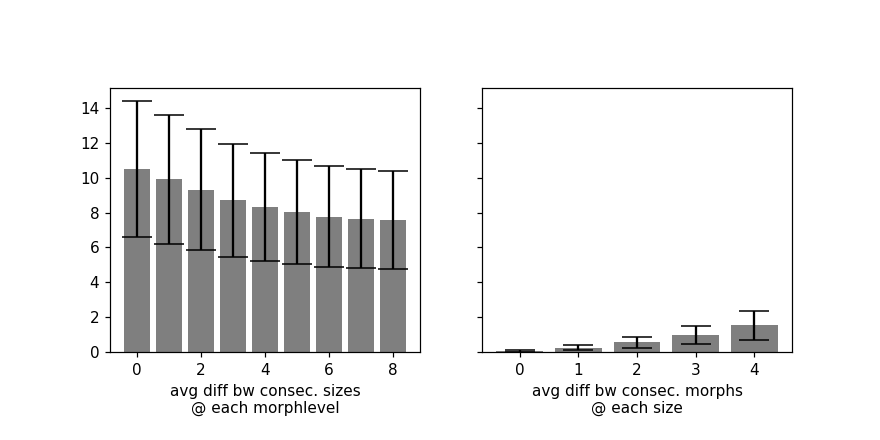

In [736]:
fig, axes = pl.subplots(1, 2, figsize=(8, 4), sharey=True)
fig.patch.set_alpha(1)
ax = axes[0]
ax.bar(np.arange(0, len(morph_diffs)), morph_diffs, yerr=morph_stds, color='k',
                 align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xlabel('avg diff bw consec. sizes\n@ each morphlevel')
# ax.legend()
# ax.set_ylabel('luminance diff')
# ax.grid(True)

ax = axes[1]
ax.bar(np.arange(0, len(size_diffs)), size_diffs, yerr=size_stds, color='k',
                 align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xlabel('avg diff bw consec. morphs\n@ each size')
# ax.legend()
# ax.set_ylabel('luminance diff')
# ax.grid(True)


pl.subplots_adjust(top=0.8, wspace=0.2, bottom=0.2)


pl.savefig(os.path.join(stim_outdir, 'average_diff_bw_consecutives.svg'))
pl.savefig(os.path.join(stim_outdir, 'average_diff_bw_consecutives.png'))


In [780]:
xmax

0.091912829571085417

JC084-20190522-FOV1_zoom2p0x-traces001
... [JC084|20190522|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_ea0b53_traces001_92d492_traces001_af4cfd_traces001_9188fa_traces001_b44714_traces001_133108/data_arrays/np_subtracted.npz
NP_subtracted offset was: 87.95
adding NP offset... (NP baseline offset: 588.05)
((268500, 260), (260,), ())
... updating self
/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/neural-types/example-cells/V1_JC084-20190522-FOV1_zoom2p0x-traces001


<IPython.core.display.Javascript object>


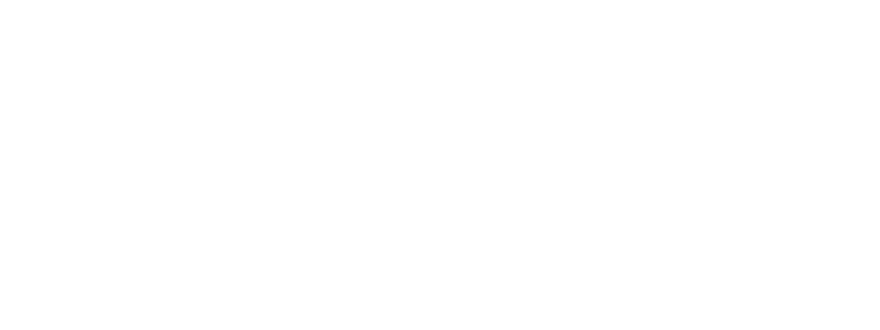

<IPython.core.display.Javascript object>


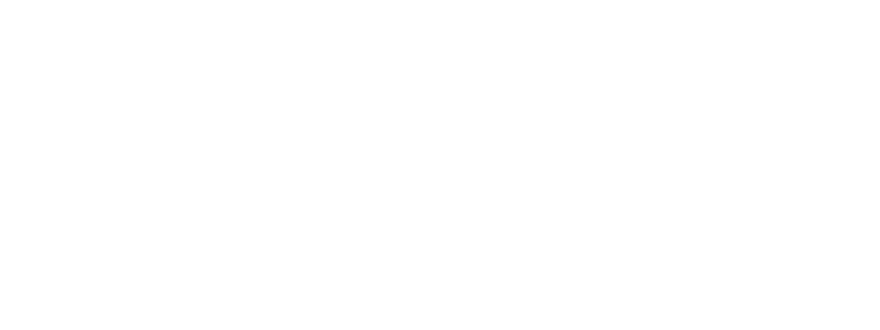

<IPython.core.display.Javascript object>


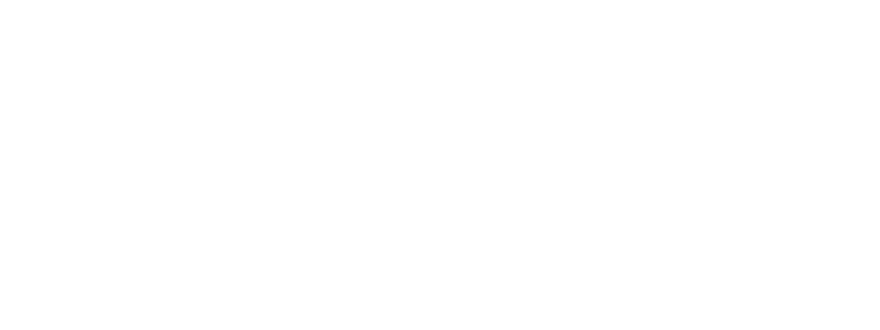

<IPython.core.display.Javascript object>


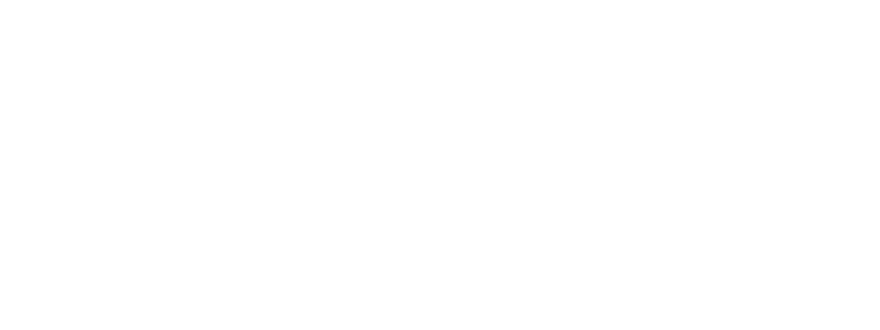

<IPython.core.display.Javascript object>


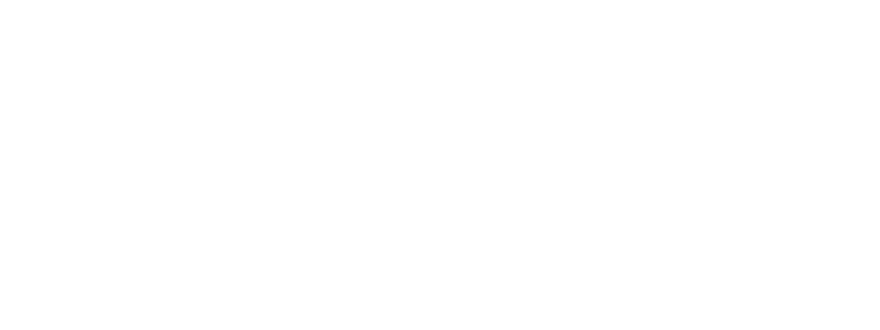

--- done plotting ---


In [333]:
#if make_pretty_plots:
visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session)]['visual_area'].unique()[0]
skey = '-'.join([animalid, session, fov, traceid])
print(skey)

roidir = os.path.join(neuraltypes_dir, 'example-cells', '%s_%s' % (visual_area, skey))
if not os.path.exists(roidir):
    os.makedirs(roidir)

# Load experiment neural data
fov = 'FOV%i_zoom2p0x' % fovnum
exp = util.Objects(animalid, session, fov, traceid=traceid)
exp.load(trace_type='dff', update_self=True, make_equal=True)
dff_traces = exp.data.traces 

sdf = reformat_morph_values(exp.data.sdf)
labels = exp.data.labels
print(roidir)


17


<IPython.core.display.Javascript object>


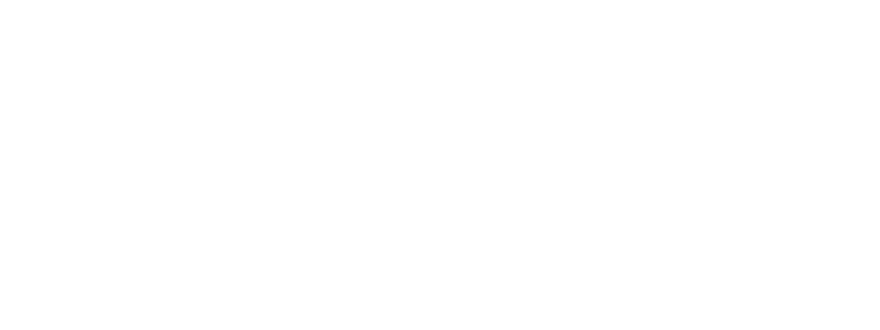

54


<IPython.core.display.Javascript object>


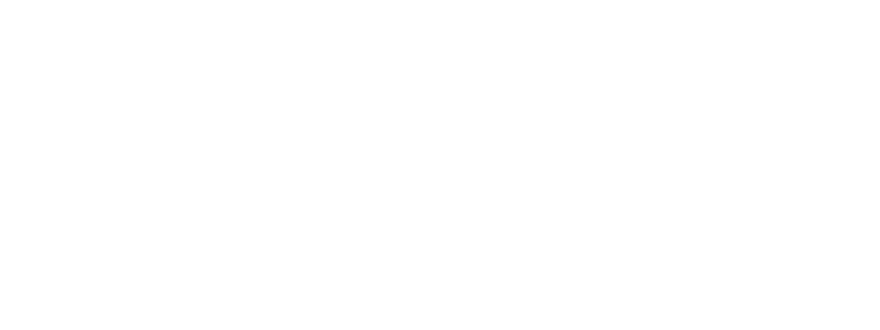

123


<IPython.core.display.Javascript object>


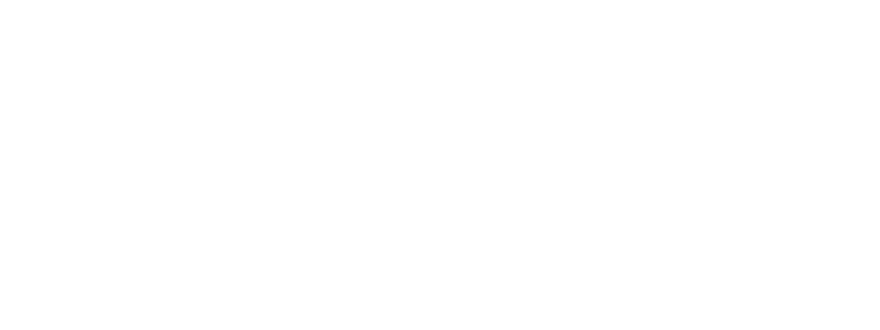

155


<IPython.core.display.Javascript object>


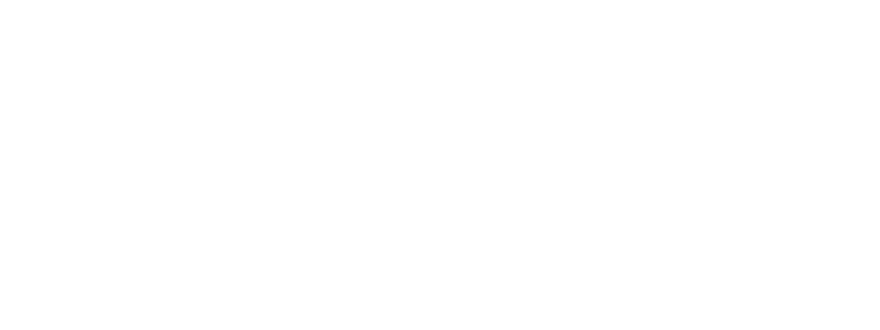

190


<IPython.core.display.Javascript object>


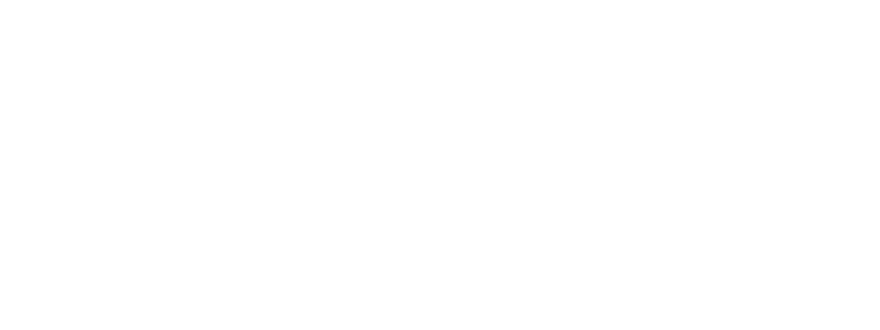

--- done plotting ---


In [334]:

for rid in rcoefs[rcoefs['R2']>0.2]['rid'].unique():
    print(rid)
    fig = pretty_psth(dff_traces[rid], labels, sdf, colormap='coolwarm', ymax=0.5)
    fig.suptitle('roi %i' % (int(rid+1)))
    label_figure(fig, skey)

    pl.savefig(os.path.join(roidir, 'roi%05d.svg' % int(rid+1)))
    pl.close()
print("--- done plotting ---")

In [ ]:
rcoefs = []
for rid in roi_list:   

    # Only select trials with pupil dataa
    meanr = mean_responses[[rid, 'config']].loc[included_trial_nums].copy()

    # Get sample data
    Xs, ys = get_sample_data(rid, rf_luminances, meanr, x1, x2, x3)

    # Split test set
    train_x, test_x, train_y, test_y = train_test_split(Xs, ys, train_size=0.8, test_size=0.2, random_state=0)      
    scaler = StandardScaler().fit(train_x.values)

    # Fit linear regression w/ ridge regularization
    ridge_regr = RidgeCV(normalize=False, cv=None, store_cv_values=True)

    ridge_regr.fit(scaler.transform(train_x), train_y)
    prediction = ridge_regr.predict(scaler.transform(test_x))
    R2_score = ridge_regr.score(scaler.transform(test_x), test_y)
    mse = skmetrics.mean_squared_error(test_y, prediction)

    coef_dict = dict(('x%i' % i, coef_val) for i, coef_val in enumerate(ridge_regr.coef_))
    coef_dict.update({'R2': R2_score, 
                      'MSE': mse,
                      'rid': rid,
                      'visual_area': visual_area,
                      'datakey': datakey})

    rcoefs.append(pd.DataFrame(coef_dict, index=[rid]))

## Classify and sort neurons

In [ ]:
neuraltypes_dir = os.path.join(aggregate_dir, 'behavior-state', 'neural-types')
if not os.path.exists(neuraltypes_dir):
    os.makedirs(neuraltypes_dir)
print(neuraltypes_dir)

In [160]:
fit_thr = 0.1

good_fits = regcoefs[regcoefs['R2']>=fit_thr].copy()
#print(good_fits.shape)

(5, 6)


<IPython.core.display.Javascript object>


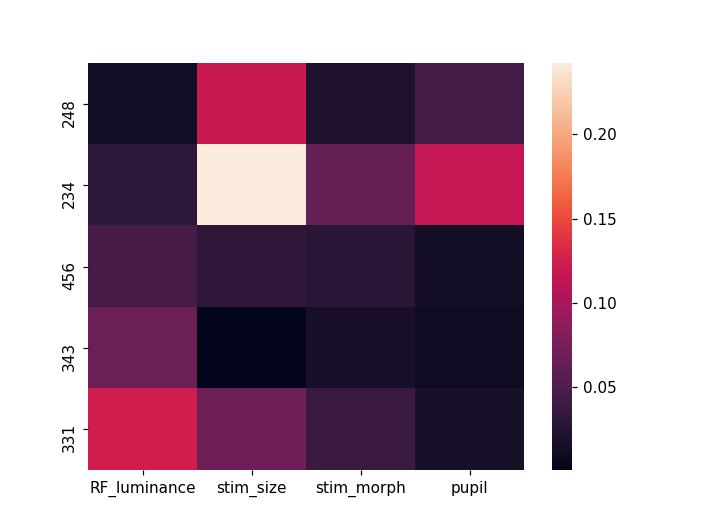

coefs_R2-0.10__regr-RF_luminance-stim_size-stim_morph-pupil


In [161]:
#regressor_names = ['RF_luminance', 'morph', 'size']

regressor_placeholders = ['x%i' % i for i in np.arange(0., len(regressor_names))]

fig, ax = pl.subplots() #pl.figure()
sns.heatmap(good_fits.abs().sort_values(by='x0')[regressor_placeholders], ax=ax)
ax.set_xticklabels(regressor_names)

regr_str = '-'.join(regressor_names)
figname = 'coefs_R2-%.2f__regr-%s' % (fit_thr, regr_str)
print(figname)

pl.savefig(os.path.join(neuraltypes_dir, '%s_%s.svg' % (figname, datakey)))

### Make pretty psth

In [147]:
if make_pretty_plots:
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session)]['visual_area'].unique()[0]
    skey = '-'.join([animalid, session, fov, traceid])
    print(skey)

    roidir = os.path.join(neuraltypes_dir, 'example-cells', '%s_%s' % (visual_area, skey))
    if not os.path.exists(roidir):
        os.makedirs(roidir)

    # Load experiment neural data
    fov = 'FOV%i_zoom2p0x' % fovnum
    exp = util.Objects(animalid, session, fov, traceid=traceid)
    exp.load(trace_type='dff', update_self=True, make_equal=True)
    dff_traces = exp.data.traces 

    sdf = reformat_morph_values(exp.data.sdf)
    labels = exp.data.labels
    print(roidir)

    for rid in good_fits['rid'].unique():

        fig = pretty_psth(dff_traces[rid], labels, sdf, colormap='coolwarm', ymax=0.5)
        fig.suptitle('roi %i' % (int(rid+1)))
        label_figure(fig, skey)

        pl.savefig(os.path.join(roidir, 'roi%05d.svg' % int(rid+1)))
        pl.close()
    print("--- done plotting ---")

JC091-20190614-FOV1_zoom2p0x-traces001
... [JC091|20190614|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC091/20190614/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_1109ae_traces001_920e9d_traces001_8dceeb_traces001_7c7a76_traces001_cc90dc_traces001_344475/data_arrays/np_subtracted.npz
NP_subtracted offset was: 15.62
adding NP offset... (NP baseline offset: 327.45)
((201000, 533), (533,), ())
... updating self


#### clf

In [156]:
good_fits.sort_values(by='rid')

,R2,rid,x0,x1,x2,x3
234,0.261448,234,0.029605,-0.242092,0.063659,0.117030
248,0.261646,248,0.012491,-0.119704,0.020094,0.044625
331,0.155447,331,0.124737,0.069003,0.037932,0.016445
343,0.104179,343,-0.067227,-0.000762,-0.016217,0.010451
456,0.131431,456,-0.046682,0.030267,-0.027440,0.012589


In [157]:
regressor_mapping = dict((x, n) for x, n in zip(regressor_placeholders, regressor_names))
print(regressor_mapping)

{'x2': 'stim_morph', 'x3': 'pupil', 'x0': 'RF_luminance', 'x1': 'stim_size'}


In [158]:
roi_types = dict((r, []) for r in regressor_names)

for rid, g in good_fits.groupby(['rid']):
    max_weight = float(g[regressor_placeholders].abs().max().max())
    type_name = [r for r in regressor_placeholders if float(g[r].abs().values) == max_weight][0]
    
    roi_types[regressor_mapping[type_name]].append( (rid, max_weight) )
    

In [159]:
for rname, rvals in roi_types.items():
    print(rname)
    ixs = np.argsort([r[1] for r in rvals])[::-1]
    for (rid, wt) in np.array(rvals)[ixs]:
        print(rid, wt)


stim_morph
stim_size
(234.0, 0.24209235883919317)
(248.0, 0.11970366887137779)
pupil
RF_luminance
(331.0, 0.12473728689414321)
(343.0, 0.067227315166668411)
(456.0, 0.046681793932316543)


# Get n cells per visual area

In [55]:
counts = dict((k, []) for k in ['V1', 'Lm', 'Li'])
for k, o in MODELS.items():
    #print(k, len(o.keys()))
    sess, animal, fv, exp = k.split('_')
    varea = dsets[(dsets['animalid']==animal) & (dsets['session']==sess)]['visual_area'].iloc[0]
    
    counts[varea].append(len(o.keys()))

In [436]:
for k, v in counts.items():
    print k, np.sum(v)

V1 1079
Lm 1095
Li 938


In [437]:
R2_all.groupby(['visual_area']).mean()

,R2,pval,sig
visual_area,,,
Li,0.011168,0.189322,0.582090
Lm,0.006915,0.230240,0.482192
V1,0.015832,0.128729,0.678406


In [438]:
R2_all[R2_all['sig']==1].groupby(['visual_area']).mean()

,R2,pval,sig
visual_area,,,
Li,0.018526,0.006598,1
Lm,0.013481,0.006770,1
V1,0.022863,0.004224,1


In [439]:
R2_all.groupby(['visual_area']).count()

,R2,datakey,pval,sig
visual_area,,,,
Li,938,938,938,938
Lm,1095,1095,1095,1095
V1,1079,1079,1079,1079


# Fit model

In [50]:


def fit_linear_model_per_roi(residuals_pupil, residuals_neural, datakey, visual_area, indepvar_x='pupildiam'):

    responsive_cells = residuals_neural.columns.tolist()
    pupil_values = residuals_pupil.sort_values(by='trial')['pupil']
    #dropped_ = np.where(np.isnan(pupil_values))[0]
    #keep_ = np.array([i for i in np.arange(0, len(pupil_values)) if i not in dropped_])
    dropped_ = np.array([i for i in pupil_values.index.tolist() if np.isnan(i)])
    keep_ = np.array([i for i in pupil_values.index.tolist() if i not in dropped_])

    #xdf = residuals_neural.iloc[keep_].copy()
    xdf = residuals_neural.loc[keep_].copy()
    xdf['pupildiam'] = pupil_values[keep_].copy()

    ols = {}
    for rid in responsive_cells:
        roi_index = list(responsive_cells).index(rid)

        model = sm.OLS(xdf[rid], sm.add_constant(xdf[indepvar_x]))
        modelfit = model.fit()
        p = modelfit.params

        ols[rid] = modelfit


    R2 = pd.DataFrame({'R2': [ols[rid].rsquared for rid in responsive_cells],
                       'pval': [ols[rid].f_pvalue for rid in responsive_cells],
                       'datakey': [datakey for _ in np.arange(0, len(responsive_cells))],
                       'visual_area': [visual_area for _ in np.arange(0, len(responsive_cells))]})
    return ols, R2



In [60]:
dsets.head()

,index,animalid,experiment,fov,session,visual_area,fovnum
0,2,JC084,blobs,FOV1_zoom2p0x,20190522,V1,1
1,6,JC084,blobs,FOV1_zoom2p0x,20190525,Lm,1
2,12,JC091,blobs,FOV1_zoom2p0x,20190627,Lm,1
4,22,JC091,blobs,FOV1_zoom2p0x,20190607,Li,1
5,26,JC091,blobs,FOV1_zoom2p0x,20190614,Li,1


# OLS for each neuron

In [518]:
bad_diams = []
f_MODELS = {}
f_R2list = []

fit_residuals = True
data_type = 'residuals_' if fit_residuals else ''

for datakey in DATA.keys():
    neuraldf = DATA[datakey]['%sneural' % data_type]
    pupildf = DATA[datakey]['%spupil' % data_type]
    #assert len(np.where(pupildf < 0)[0]) == 0, "Bad"
    if len(np.where(pupildf < 0)[0]) != 0 and fit_residuals is False:
        print("%s -- Bad pupil measures" % datakey)
        bad_diams.append(datakey)
        continue
    session, animalid, fovn, cexp = datakey.split('_')
    fovnum = int(fovn[3:])
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]
    
    # Fit model to     
    ols, R2 = fit_linear_model_per_roi(pupildf, neuraldf,
                               visual_area=visual_area, datakey=datakey,
                               indepvar_x='pupildiam')
    f_MODELS[datakey] = ols
    f_R2list.append(R2)
R2_f = pd.concat(f_R2list, axis=0)


In [519]:
metric = 'R2' 
R2_by_session = []
for visual_area, g in R2_f.groupby(['visual_area']):
    if metric == 'pval':
        vals = g[g['sig']==1].groupby(['datakey']).mean()[metric]
    else:
        vals = g.groupby(['datakey']).mean()[metric]
    
    R2_by_session.append(pd.DataFrame({'R2': vals,
                                      'visual_area': visual_area}))
R2_by_session = pd.concat(R2_by_session, axis=0)


<IPython.core.display.Javascript object>


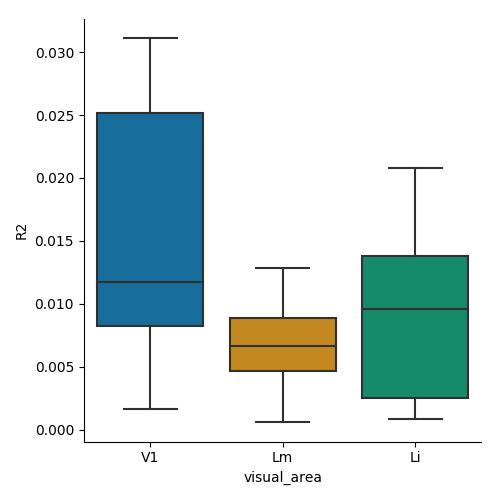

ols_by-session_fit-residuals_R2


In [521]:
#pl.figure()

sns.catplot(x='visual_area', y='R2', kind='box', data=R2_by_session, order=['V1', 'Lm', 'Li'],
           palette='colorblind')

fit_str = 'residuals' if fit_residuals else 'responses'
figname = 'ols_by-session_fit-%s_%s'  % (fit_str, metric)
pl.savefig(os.path.join(outdir, '%s.svg' % figname))

print(figname)


## Stats?

In [522]:
import statsmodels.stats.multicomp as ml


In [523]:
c1 = R2_by_session[R2_by_session['visual_area']=='V1']['R2']
c2 = R2_by_session[R2_by_session['visual_area']=='Lm']['R2']
c3 = R2_by_session[R2_by_session['visual_area']=='Li']['R2']
print(c1.shape, c2.shape, c3.shape)

((10,), (11,), (11,))


In [524]:
# Shapiro-Wilk normality test 
spstats.shapiro(c1), spstats.shapiro(c2), spstats.shapiro(c3) 

# Shapiro-Wilk normality test 
spstats.shapiro(c1), spstats.shapiro(c2), spstats.shapiro(c3) 

((0.8674817085266113, 0.09342168271541595),
 (0.9127958416938782, 0.2631151080131531),
 (0.9018121957778931, 0.19449283182621002))

In [525]:
F, p = spstats.f_oneway(c1, c2, c3)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

scores = np.hstack([c1, c2, c3])
groups = np.hstack([['V1' for _ in range(len(c1))], 
                   ['Lm' for _ in range(len(c2))],
                   ['Li' for _ in range(len(c3))]])
#print(scores.shape)
#print(groups.shape)


# Note that data in sheet have been preformatted in Group and Score columns 
# Boolean values refer to whether we should reject the null hypothesis (H0) that
# the means of the tested pair are statistically similar (non-significant differences)

mcobj = ml.MultiComparison(scores, groups)
out = mcobj.tukeyhsd(0.05) 

print(out)

F statistic = 3.314 and probability p = 0.051
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  Li     Lm   -0.0022  -0.0103 0.0059 False 
  Li     V1    0.0062  -0.0021 0.0144 False 
  Lm     V1    0.0084   0.0001 0.0166  True 
--------------------------------------------


#### Collapse all neurons

In [526]:
R2_f.groupby(['visual_area']).mean()

,R2,pval
visual_area,,
Li,0.011168,0.189322
Lm,0.006915,0.230240
V1,0.015832,0.128729


In [527]:
R2_f['sig'] = [1 if p<0.05 else 0 for p in R2_f['pval']]
R2_f[R2_f['sig']==1].groupby(['visual_area']).mean()

,R2,pval,sig
visual_area,,,
Li,0.018526,0.006598,1
Lm,0.013481,0.006770,1
V1,0.022863,0.004224,1


<IPython.core.display.Javascript object>


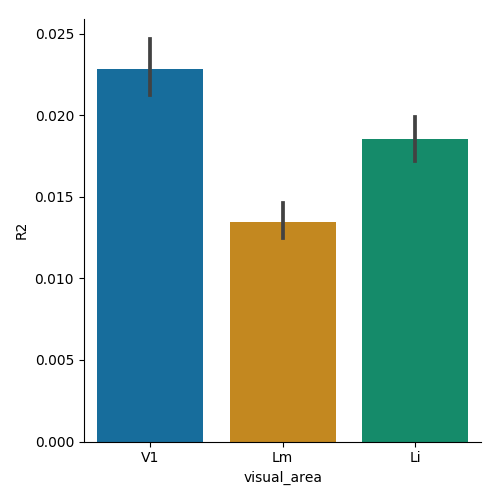

residuals


In [528]:
#fig, ax = pl.subplots(1,2, figsize=(10,4))
sns.catplot(x='visual_area', y='R2', kind='bar',
            data=R2_f[R2_f['sig']==1], palette='colorblind', order=['V1', 'Lm', 'Li'],
            #hue='sig',
            alpha=1, height=5, legend_out=False) #ax[0]) #, ax=ax) #, ax=ax) #color='k', alpha=0.1, ax=ax)

pl.ylabel('R2')

#pl.show()

pl.savefig(os.path.join(outdir, 'ols_collapse-sessions_fit-%s.png' % fit_str))
print(fit_str)

# Ridge

In [539]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer, quantile_transform
#from sklearn.compose import TransformedTargetRegressor
import sklearn.metrics as skmetrics #import median_absolute_error, r2_score



In [531]:
import sklearn
sklearn.__version__

'0.19.1'

In [532]:
datakey

'20190616_JC097_fov1_blobs'

In [305]:
neuraldf = DATA[datakey]['neural']
pupildf = DATA[datakey]['pupil']
session, animalid, fovn, cexp = datakey.split('_')
fovnum = int(fovn[3:])
visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]

# Split test set
curr_rois = [col for col in neuraldf.columns.tolist() if col != 'config']
train_x = neuraldf[curr_rois].iloc[0::2]
test_x = neuraldf[curr_rois].iloc[1::2]
train_y = pupildf['pupil'].iloc[0::2]
test_y = pupildf['pupil'].iloc[1::2]

scaler = StandardScaler().fit(train_x.values)


In [307]:
ridge = Ridge(normalize=False)

# Grid search
params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
n_folds = None
grid = GridSearchCV(ridge, params, scoring='mean_squared_error') #, 
                          #cv=None, store_cv_values=True)
grid.fit(scaler.transform(train_x), train_y)

# summarize results
#grid_results.append(pd.DataFraem('datakey': datake grid.best_score_)
print(grid.best_estimator_.alpha)

10.0


/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error 

In [533]:
# f_MODELS = {}
# f_R2list = []
grid_results = []
for di, datakey in enumerate(DATA.keys()):
    neuraldf = DATA[datakey]['neural']
    pupildf = DATA[datakey]['pupil']
    session, animalid, fovn, cexp = datakey.split('_')
    fovnum = int(fovn[3:])
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]
    
    # Split test set
    curr_rois = [col for col in neuraldf.columns.tolist() if col != 'config']
    train_x = neuraldf[curr_rois].iloc[0::2]
    test_x = neuraldf[curr_rois].iloc[1::2]
    train_y = pupildf['pupil'].iloc[0::2]
    test_y = pupildf['pupil'].iloc[1::2]
    scaler = StandardScaler().fit(train_x.values)
    
    # Grid search
    params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
    n_folds = None
    ridge = Ridge(normalize=False)
    grid = GridSearchCV(ridge, params, scoring='neg_mean_squared_error') #, 
                              #cv=None, store_cv_values=True)
    grid.fit(scaler.transform(train_x), train_y)
    
    grid_results.append(pd.DataFrame({'visual_area': visual_area,
                         'datakey': datakey,
                         'best_alpha': grid.best_estimator_.alpha,
                          'best_mse': grid.best_score_}, index=[di]) )
    
grid_results = pd.concat(grid_results, axis=0)

#     f_MODELS[datakey] = {'data': {'train_x': train_x, 
#                                   'train_y': train_y,
#                                   'test_x': test_x,
#                                   'test_y': test_y},
#                          'grid_results': grid}
                          
    
#     ols, R2 = fit_linear_model_per_roi(pupildf, neuraldf,
                                       
#                                visual_area=visual_area, datakey=datakey,
#                                indepvar_x='pupildiam')
#     f_MODELS[datakey] = ols
#     f_R2list.append(R2)
# R2_f = pd.concat(f_R2list, axis=0)
# R2_f['sig'] = [1 if p<0.01 else 0 for p in R2_f['pval']]


In [534]:
grid_results.groupby(['visual_area']).mean()

,best_alpha,best_mse
visual_area,,
Li,10.0,-37.051330
Lm,10.0,-18.919736
V1,10.0,-19.401806


In [535]:
datakey

'20190616_JC097_fov1_blobs'

In [536]:
neuraldf = DATA[datakey]['neural']
pupildf = DATA[datakey]['pupil']
session, animalid, fovn, cexp = datakey.split('_')
fovnum = int(fovn[3:])
visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]

# Split test set
curr_rois = [col for col in neuraldf.columns.tolist() if col != 'config']
train_x = neuraldf[curr_rois].iloc[0::2]
test_x = neuraldf[curr_rois].iloc[1::2]
train_y = pupildf['pupil'].iloc[0::2]
test_y = pupildf['pupil'].iloc[1::2]
scaler = StandardScaler().fit(train_x.values)

# Grid search
#params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
#n_folds = None
ridge = RidgeCV(normalize=False, cv=None, store_cv_values=True)
# ridge = TransformedTargetRegressor(
#     regressor=RidgeCV(),
#     transformer=QuantileTransformer(n_quantiles=300,
#                                     output_distribution='normal'))
#regr_trans.fit(X_train, y_train)

ridge.fit(scaler.transform(train_x), train_y)
prediction = ridge.predict(scaler.transform(test_x))
R2_score = ridge.score(scaler.transform(test_x), test_y)
print(R2_score)

0.194060702115


In [434]:
prediction.shape

(749,)

<IPython.core.display.Javascript object>


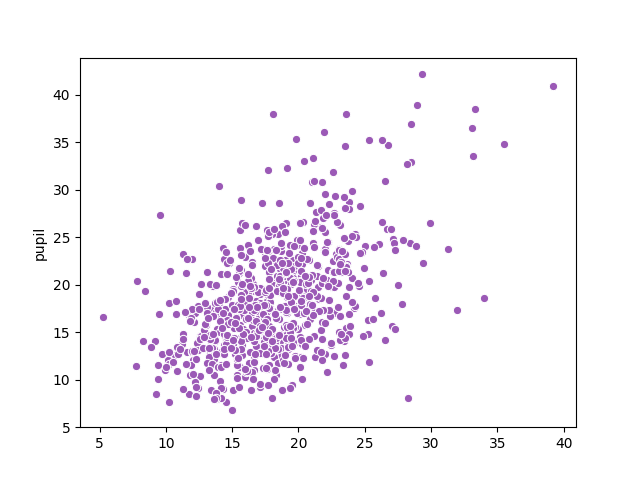

In [435]:
pl.figure()
sns.scatterplot(prediction, test_y)

In [191]:
train_x.shape

(750, 188)

In [550]:
fit_residuals = True

data_type = 'residuals_' if fit_residuals else ''
ridge_results = []
for di, datakey in enumerate(DATA.keys()):
    neuraldf = DATA[datakey]['%sneural' % data_type]
    pupildf = DATA[datakey]['%spupil' % data_type]
    session, animalid, fovn, cexp = datakey.split('_')
    fovnum = int(fovn[3:])
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]
    
    # Split test set
    curr_rois = [col for col in neuraldf.columns.tolist() if col != 'config']
    train_x = neuraldf[curr_rois].iloc[0::2]
    test_x = neuraldf[curr_rois].iloc[1::2]
    train_y = pupildf['pupil'].iloc[0::2]
    test_y = pupildf['pupil'].iloc[1::2]
    scaler = StandardScaler().fit(train_x.values)

    # Grid search
    regr_ridge = RidgeCV(normalize=False, cv=None, store_cv_values=False, gcv_mode='svd')
    regr_ridge.fit(scaler.transform(train_x), train_y)
    prediction = regr_ridge.predict(scaler.transform(test_x))
    R2_score = regr_ridge.score(scaler.transform(test_x), test_y)
    MAE =  skmetrics.median_absolute_error(test_y, prediction)
    #print(R2_score)
    r, pval = spstats.pearsonr(test_y, prediction)
    
    ridge_results.append(pd.DataFrame({'visual_area': visual_area,
                                      'datakey': datakey,
                                       'MAE': MAE,
                                      'R2': R2_score, 
                                       'pearson_r': r,
                                       'p_value': pval}, index=[di]) )
                        
    
ridge_results = pd.concat(ridge_results, axis=0)

<IPython.core.display.Javascript object>


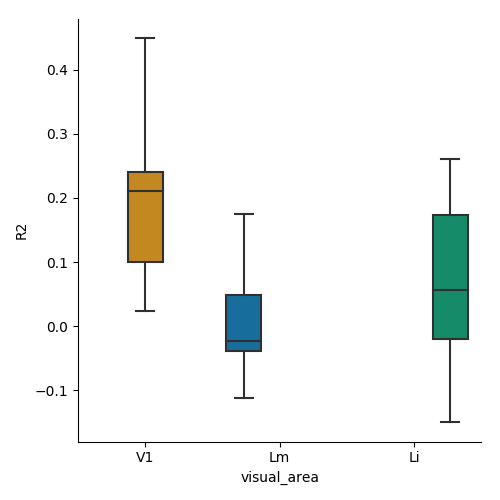

ridge_fit-residuals_R2


In [551]:
#fig, ax = pl.subplots()

#R2_f['sig'] = [1 if p<0.01 else 0 for p in R2_f['pval']]
#R2['empty'] = [1 for _ in np.arange(0, R2.shape[0])]
metric = 'R2'

sns.catplot(x='visual_area', y=metric, kind='box', palette='colorblind', order=['V1', 'Lm', 'Li'],
            hue='visual_area', data=ridge_results[ridge_results['p_value']<0.05]) #, 
            #alpha=0.5, height=5, legend_out=False, ax=ax) #, ax=ax) #color='k', alpha=0.1, ax=ax)

pl.ylabel(metric)
#pl.xticks([])
#pl.xlabel('')

#pl.subplots_adjust(right=0.9)
label_figure(fig, datakey)

fit_str = 'residuals' if fit_residuals else 'responses'
figname = 'ridge_fit-%s_%s'  % (fit_str, metric)
pl.savefig(os.path.join(outdir, '%s.svg' % figname))

print(figname)

#### Stats

In [552]:
c1 = ridge_results[(ridge_results['p_value']<0.05) & (ridge_results['visual_area']=='V1')]['R2']
c2 = ridge_results[(ridge_results['p_value']<0.05) & (ridge_results['visual_area']=='Lm')]['R2']
c3 = ridge_results[(ridge_results['p_value']<0.05) & (ridge_results['visual_area']=='Li')]['R2']
print(c1.shape, c2.shape, c3.shape)

((9,), (9,), (10,))


In [553]:
F, p = spstats.f_oneway(c1, c2, c3)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

scores = np.hstack([c1, c2, c3])
groups = np.hstack([['V1' for _ in range(len(c1))], 
                   ['Lm' for _ in range(len(c2))],
                   ['Li' for _ in range(len(c3))]])
#print(scores.shape)
#print(groups.shape)


# Note that data in sheet have been preformatted in Group and Score columns 
# Boolean values refer to whether we should reject the null hypothesis (H0) that
# the means of the tested pair are statistically similar (non-significant differences)

mcobj = ml.MultiComparison(scores, groups)
out = mcobj.tukeyhsd(0.05) 

print(out)

F statistic = 5.148 and probability p = 0.013
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  Li     Lm    -0.047  -0.1881 0.0942 False 
  Li     V1    0.1325  -0.0086 0.2736 False 
  Lm     V1    0.1795   0.0346 0.3243  True 
--------------------------------------------


<IPython.core.display.Javascript object>


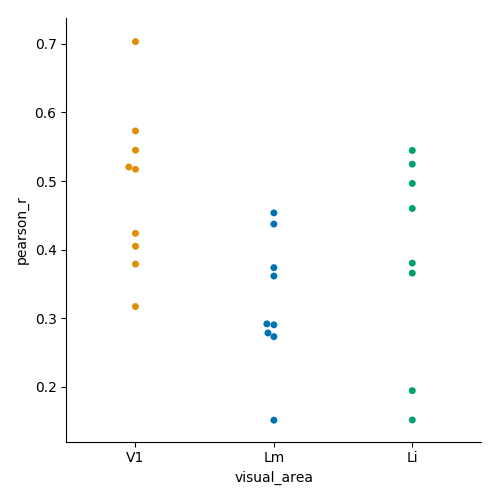

Text(9.44444,0.5,u'pearson_r')

In [554]:
metric = 'pearson_r'

sns.catplot(x='visual_area', y=metric, kind='swarm', palette='colorblind', order=['V1', 'Lm', 'Li'],
            hue='visual_area', data=ridge_results[ridge_results['p_value']<0.01]) #, 
            #alpha=0.5, height=5, legend_out=False, ax=ax) #, ax=ax) #color='k', alpha=0.1, ax=ax)

pl.ylabel(metric)
#pl.xticks([])
#pl.xlabel('')


In [431]:
ridge_results.shape

(32, 5)

# Fano Factor

In [241]:
datakey

'20190616_JC097_fov1_blobs'

In [423]:
fano_dfs = []
neuraldf = DATA[datakey]['neural']
pupildf = DATA[datakey]['pupil']
print(neuraldf.shape)
curr_rois = neuraldf.columns.tolist()
for rid in curr_rois:
    fano_factor = np.array([np.var(abs(neuraldf[rid].loc[g.index]), ddof=1) / np.nanmean(abs(neuraldf[rid].loc[g.index])) \
                     for cfg, g in pupildf.groupby(['config'])])

    response_mag = np.array([np.nanmean(abs(neuraldf[rid].loc[g.index])) for cfg, g in pupildf.groupby(['config'])])
    #print(response_mag.shape, fano_factor.shape)
    
    fdf = pd.DataFrame({'fano_factor': fano_factor,
                        'response_mag': response_mag,
                        'rid': [rid for _ in np.arange(0, len(fano_factor))]})
    fano_dfs.append(fdf)

(1499, 188)


In [424]:
fano_df = pd.concat(fano_dfs, axis=0)

In [558]:
nrois = len(fano_df['rid'].unique())
colorlist = sns.color_palette('cubehelix', n_colors = nrois)
roi_colors = dict((r, col) for r, col in zip(fano_df['rid'].unique(), colorlist))

In [562]:
sorted_ixs = np.argsort(g['response_mag'])



<IPython.core.display.Javascript object>


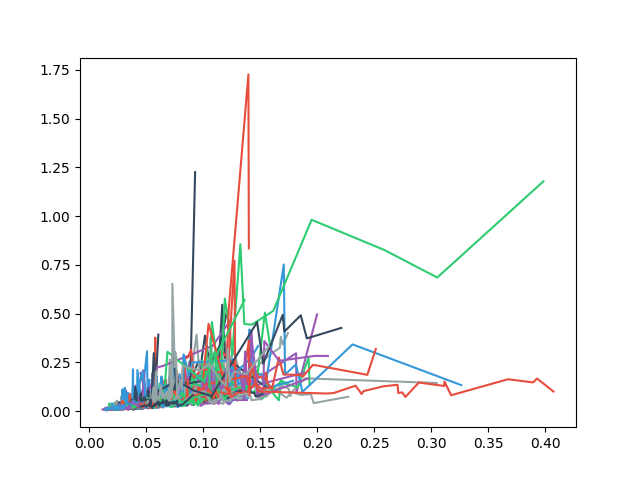

In [567]:
pl.figure()
for rid, g in fano_df.groupby(['rid']):
    sorted_ixs = np.argsort(g['response_mag'])
    pl.plot(g['response_mag'][sorted_ixs], g['fano_factor'][sorted_ixs]) #, color=roi_colors[rid])
#sns.scatterplot(x='response_mag', y='fano_factor', hue='rid', palette='hsv', data=fano_df)

In [421]:
g.shape

(50, 3)

In [367]:
neuraldf.shape

(1499, 188)

In [342]:
fanos = []
for cfg, g in pupildf.groupby(['config']):
    ff_pupil = [float( np.var(g['pupil'], ddof=1) / np.nanmean(g[['pupil']]) ) \
                for cfg, g in pupildf.groupby(['config'])]
    
    ff_neural = [np.var(abs(neuraldf[rid].loc[g.index]), ddof=1) / np.nanmean(abs(neuraldf[rid].loc[g.index]))\
                 for cfg, g in pupildf.groupby(['config'])]
    
    nrois = len(ff_neural)
    fanos.append( pd.DataFrame({'config': [cfg for _ in np.arange(nrois)],
                  'ff_pupil': [ff_pupil for _ in np.arange(nrois)],
                  'ff_neural': ff_neural,
                  'roi': neuraldf.columns.tolist()}) )
    
fanos = pd.concat(fanos, axis=0)

In [374]:
fit_residuals = True

data_type = 'residuals_' if fit_residuals else ''
#for di, datakey in enumerate(DATA.keys()):
neuraldf = DATA[datakey]['%sneural' % data_type]
pupildf = DATA[datakey]['%spupil' % data_type]
session, animalid, fovn, cexp = datakey.split('_')
fovnum = int(fovn[3:])
visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]


<IPython.core.display.Javascript object>


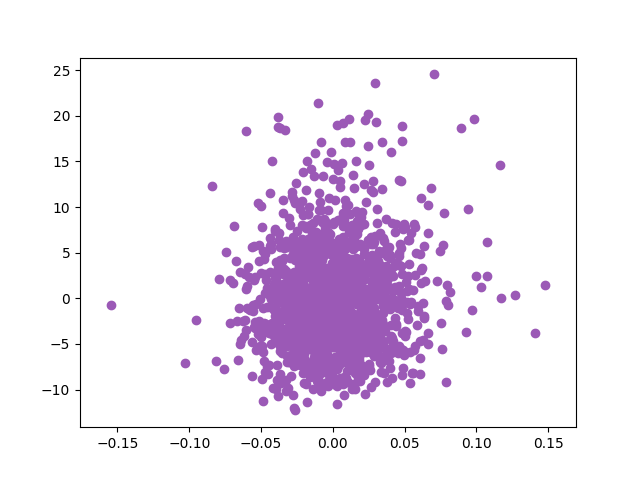

In [379]:
pl.figure()
pl.scatter(neuraldf[rid], pupildf['pupil'])


In [389]:
print(rid)
ff_pupil = float( np.var(abs(pupildf['pupil']), ddof=1) / np.nanmean(abs(pupildf['pupil'])) )

ff_neural = float( np.var(abs(neuraldf[rid]), ddof=1) / np.nanmean(abs(neuraldf[rid])) )

print(rid, ff_pupil, ff_neural)

431
(431, 2.853716963408797, 0.016341970374077086)


In [390]:
curr_rois = neuraldf.columns.tolist()
ff_neurals = [float( np.var(abs(neuraldf[rid]), ddof=1) / np.nanmean(abs(neuraldf[rid])) ) \
 for rid in curr_rois]


<IPython.core.display.Javascript object>


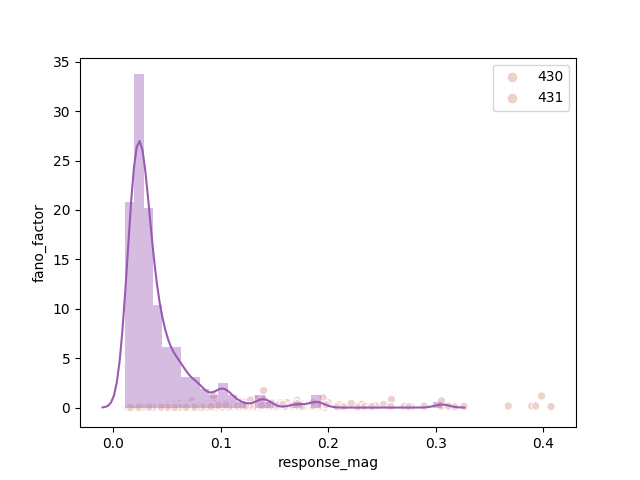

In [392]:
pl.figure()
sns.distplot(ff_neurals)

In [373]:
len(ff_pupil), len(ff_neural)

(50, 50)

In [353]:
ff_neural

ff_neural  ff_pupil
roi config                        
90  config001   0.021902  1.651433
    config002   0.020529  1.284894
    config003   0.019403  1.800445
    config004   0.018906  2.473949
    config005   0.016051  0.968366
    config006   0.031666  1.246181
    config007   0.060472  1.829322
    config008   0.039056  1.549972
    config009   0.058407  2.145511
    config010   0.021684  1.387653
    config011   0.064109  1.622180
    config012   0.071483  1.183094
    config013   0.047775  1.329624
    config014   0.049043  1.364685
    config015   0.043814  1.692130
    config016   0.047894  1.307047
    config017   0.083515  1.820424
    config018   0.092135  1.629192
    config019   0.043616  1.069145
    config020   0.031477  2.188173
    config021   0.065968  1.447792
    config022   0.071349  2.078376
    config023   0.075133  1.539280
    config024   0.090707  4.287219
    config025   0.028993  1.470476
    config026   0.063267  1.570605
    config027   0.077263  1.255422
    config028   0.093379  2.061260
    config029   0.096978  1.316704
    config030   0.030043  1.603102
    config031   0.040861  1.840564
    config032   0.053224  0.983299
    config033   0.057630  2.965408
    config034   0.060198  2.820902
    config035   0.049017  1.900978
    config036   0.046137  1.550385
    config037   0.037928  1.662427
    config038   0.075614  1.649709
    config039   0.077097  0.819739
    config040   0.044265  1.964044
    config041   0.052288  2.448013
    config042   0.057330  2.141988
    config043   0.059148  1.629000
    config044   0.058845  1.756102
    config045   0.087468  1.014411
    config046   0.099958  2.390653
    config047   0.056967  2.123924
    config048   0.038620  2.213379
    config049   0.125657  0.807814
    config050   0.073348  1.289718

In [345]:
np.var(abs(neuraldf[90].loc[g.index])) / abs(neuraldf[90].loc[g.index]).mean()

0.070903083787223153

<IPython.core.display.Javascript object>


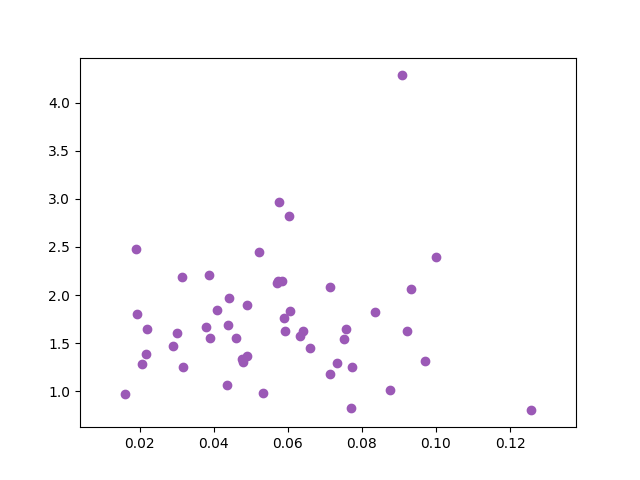

(0.047842244664200118, 0.74145414169491475)


In [355]:
pl.figure()
pl.scatter(avgs['ff_neural'].values, avgs['ff_pupil'].values)

pearson_r, p_value = spstats.pearsonr(avgs['ff_neural'].values, avgs['ff_pupil'].values)
print(pearson_r, p_value)

In [ ]:
fit_residuals = True

data_type = 'residuals_' if fit_residuals else ''
ridge_results = []
for di, datakey in enumerate(DATA.keys()):
    neuraldf = DATA[datakey]['%sneural' % data_type]
    pupildf = DATA[datakey]['%spupil' % data_type]
    session, animalid, fovn, cexp = datakey.split('_')
    fovnum = int(fovn[3:])
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]
    
    # Split test set
    curr_rois = [col for col in neuraldf.columns.tolist() if col != 'config']
    train_x = neuraldf[curr_rois].iloc[0::2]
    test_x = neuraldf[curr_rois].iloc[1::2]
    train_y = pupildf['pupil'].iloc[0::2]
    test_y = pupildf['pupil'].iloc[1::2]
    scaler = StandardScaler().fit(train_x.values)

    # Grid search
    regr_ridge = RidgeCV(normalize=False, cv=5, store_cv_values=False, gcv_mode='svd')
    regr_ridge.fit(scaler.transform(train_x), train_y)
    prediction = regr_ridge.predict(scaler.transform(test_x))
    R2_score = regr_ridge.score(scaler.transform(test_x), test_y)
    #print(R2_score)
    r, pval = spstats.pearsonr(test_y, prediction)
    
    ridge_results.append(pd.DataFrame({'visual_area': visual_area,
                                      'datakey': datakey,
                                      'R2': R2_score, 
                                       'pearson_r': r,
                                       'p_value': pval}, index=[di]) )
                        
    
ridge_results = pd.concat(ridge_results, axis=0)

In [222]:
DATA[datakey].keys()

['residuals_pupil', 'pupil', 'residuals_neural', 'neural']

<IPython.core.display.Javascript object>


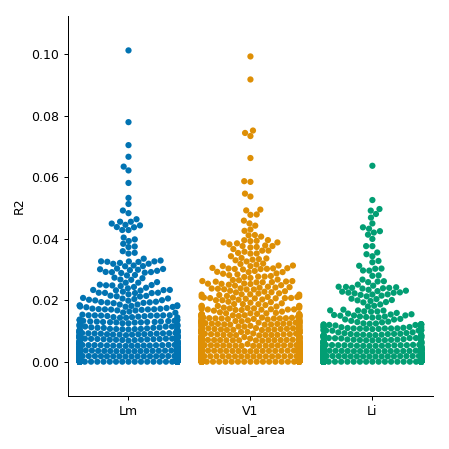

In [704]:
#fig, ax = pl.subplots()

R2_f['sig'] = [1 if p<0.05 else 0 for p in R2_f['pval']]
#R2['empty'] = [1 for _ in np.arange(0, R2.shape[0])]

sns.catplot(x='visual_area', y='R2', kind='swarm', palette='colorblind', #hue='sig', 
            data=R2_f) #, ax=ax) #color='k', alpha=0.1, ax=ax)
pl.ylabel('R2')
#pl.xticks([])
#pl.xlabel('')

label_figure(fig, datakey)

# Filter

# Get eyetracker acquisition info

# Get pupil residuals

In [649]:
residuals_pupil = pupilstats.copy()
for c, g in pupilstats.groupby(['config']):
    residuals_pupil['pupil'][g.index] = pupilstats.loc[g.index]['pupil'] - pupilstats.loc[g.index]['pupil'].mean()

/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [555]:
plot_residuals = False

if plot_residuals:
    fig, ax = pl.subplots() #pl.figure()
    for c, g in residuals_pupil.groupby(['config']):
        ax.plot(g['pupil'].dropna(), alpha=0.5)


In [554]:
# for config, g in trial_key.groupby(['config']):
#    print(g.shape)

# Get neural responses and residuals

In [561]:
R2_all[R2_all['datakey']==datakey].shape

(141, 5)

In [608]:
residuals_neural = DATA[datakey]['residuals_neural']
residuals_pupil = DATA[datakey]['residuals_pupil']
responsive_cells = residuals_neural.columns.tolist()
print(len(responsive_cells))

141


In [609]:
pupil_values = residuals_pupil.sort_values(by='trial')['pupil']

In [610]:
residuals_pupil.head()

,config,pupil,trial
0,config025,2.946112,1.0
1,config024,-0.233637,2.0
2,config046,-1.472992,3.0
3,config013,0.046228,4.0
4,config002,-2.872295,5.0


In [611]:
residuals_neural.shape

(1582, 141)

In [641]:
#dropped_ = np.where(np.isnan(pupil_values))[0]
#keep_ = np.array([i for i in np.arange(0, len(pupil_values)) if i not in dropped_])

dropped_ = [i for i in pupil_values.index.tolist() if np.isnan(i)]
keep_ = np.array([i for i in pupil_values.index.tolist() if i not in dropped_])

print("N Nans:", len(dropped_))
print("N keep:", len(keep_))


('N Nans:', 0)
('N keep:', 1582)


In [642]:
dropped_ixs = np.where(np.isnan(pupil_values))[0]
dropped_trs = np.array([i for i in pupil_values.index.tolist() if np.isnan(i)])

keep_ixs = np.array([i for i in np.arange(0, len(pupil_values)) if i not in dropped_])
keep_trs = np.array([i for i in pupil_values.index.tolist() if i not in dropped_trs])


In [644]:
#xdf = residuals_neural.iloc[keep_].copy()
xdf = residuals_neural.loc[keep_].copy()
xdf['pupildiam'] = pupil_values[keep_].copy()


In [651]:
residuals_neural.shape

(1582, 141)

In [650]:
max(keep_)

1581

In [645]:
xdf.head()

,0,1,4,6,7,13,22,24,25,27,...,254,258,259,260,261,264,265,269,270,pupildiam
0,0.536666,-0.242237,0.276863,0.552535,-0.051407,-0.180313,0.003977,-0.036779,0.138382,0.464793,...,0.400809,0.327629,0.320027,0.479045,0.832553,-0.082252,0.327724,0.164935,-0.010489,2.946112
1,0.359389,0.034676,-0.091373,0.006093,-0.074069,-0.110579,-0.027672,-0.039527,-0.088495,0.060424,...,0.006097,0.355125,-0.053250,-0.151231,-0.093623,0.219817,-0.002453,0.077677,-0.022610,-0.233637
2,-0.356232,0.131639,-0.154972,-0.075936,-0.060184,0.038357,0.067955,-0.084018,-0.003566,0.101943,...,-0.131290,0.047555,-0.027075,0.033762,-0.081263,-0.079244,-0.027671,0.312830,0.123184,-1.472992
3,1.019509,-0.061945,0.136980,0.186179,0.018295,-0.042643,-0.115071,0.257502,0.154710,0.168349,...,0.008972,0.106587,0.125058,-0.012447,0.229084,-0.010587,0.068795,0.032344,-0.049751,0.046228
4,-0.061467,0.015477,-0.027016,-0.111911,-0.088562,0.122120,0.099153,-0.011372,0.211735,0.002475,...,-0.025114,-0.040375,0.070321,0.098636,-0.037986,0.127006,0.149954,-0.235430,0.014719,-2.872295


In [646]:
ols = {}
for rid in responsive_cells:
    roi_index = list(responsive_cells).index(rid)

    model = sm.OLS(xdf[rid], sm.add_constant(xdf['pupildiam']))
    modelfit = model.fit()
    #p = modelfit.params
    #modelfit.rquared

    ols[rid] = modelfit


In [647]:

R2 = pd.DataFrame({'R2': [ols[rid].rsquared for rid in responsive_cells],
                   'pval': [ols[rid].f_pvalue for rid in responsive_cells],
                   'datakey': [datakey for _ in np.arange(0, len(responsive_cells))],
                   'visual_area': [visual_area for _ in np.arange(0, len(responsive_cells))]})

In [648]:
model = sm.OLS(xdf[rid], sm.add_constant(xdf['pupildiam']))
modelfit = model.fit()
modelfit.params

const       NaN
pupildiam   NaN
dtype: float64

In [640]:
R2

,R2,datakey,pval,visual_area
0,6.926331e-05,20190605_JC090_fov1_blobs,0.740822,V1
1,2.914088e-03,20190605_JC090_fov1_blobs,0.031795,V1
2,9.989896e-04,20190605_JC090_fov1_blobs,0.208949,V1
3,4.066685e-05,20190605_JC090_fov1_blobs,0.799924,V1
4,6.107157e-03,20190605_JC090_fov1_blobs,0.001867,V1
5,9.266029e-04,20190605_JC090_fov1_blobs,0.226255,V1
6,1.496540e-05,20190605_JC090_fov1_blobs,0.877810,V1
7,2.802830e-04,20190605_JC090_fov1_blobs,0.505789,V1
8,1.006246e-03,20190605_JC090_fov1_blobs,0.207302,V1
9,1.675616e-04,20190605_JC090_fov1_blobs,0.606919,V1


In [551]:
# Get nrois x ntrials array
roi_responses = pd.DataFrame(np.vstack([exp.data.traces.iloc[g.index].mean(axis=0)\
                                    for trial, g in labels.groupby(['trial'])]))

# Get responsive cells
responsive_cells, ncells_total = exp.get_responsive_cells(response_type='dff',\
                                                          responsive_test='ROC', responsive_thr=0.05)
print("%i out of %i cells pass responsive test." % (len(responsive_cells), ncells_total))
neuraldata = roi_responses[responsive_cells]


In [559]:
trial_configs = pd.DataFrame(np.vstack([g['config'].iloc[0]\
                                    for trial, g in labels.groupby(['trial'])]), columns=['config'])

,config
0,config032
1,config031
2,config021
3,config020
4,config003
5,config043
6,config034
7,config005
8,config012
9,config009


In [604]:
residuals_neural = neuraldata.copy()

for c, g in trial_configs.groupby(['config']):
    residuals_neural.loc[g.index] = neuraldata.loc[g.index] - neuraldata.loc[g.index].mean(axis=0)

In [606]:
ols, R2 = fit_linear_model(residuals_pupil, residuals_neural)


In [607]:
datakey, R2

('20190605_JC090_fov1_blobs',
                R2                    datakey      pval visual_area
 0    6.926331e-05  20190605_JC090_fov1_blobs  0.740822          V1
 1    2.914088e-03  20190605_JC090_fov1_blobs  0.031795          V1
 2    9.989896e-04  20190605_JC090_fov1_blobs  0.208949          V1
 3    4.066685e-05  20190605_JC090_fov1_blobs  0.799924          V1
 4    6.107157e-03  20190605_JC090_fov1_blobs  0.001867          V1
 5    9.266029e-04  20190605_JC090_fov1_blobs  0.226255          V1
 6    1.496540e-05  20190605_JC090_fov1_blobs  0.877810          V1
 7    2.802830e-04  20190605_JC090_fov1_blobs  0.505789          V1
 8    1.006246e-03  20190605_JC090_fov1_blobs  0.207302          V1
 9    1.675616e-04  20190605_JC090_fov1_blobs  0.606919          V1
 10   1.007033e-06  20190605_JC090_fov1_blobs  0.968187          V1
 11   3.092700e-05  20190605_JC090_fov1_blobs  0.825077          V1
 12   1.784242e-04  20190605_JC090_fov1_blobs  0.595494          V1
 13   1.642839e-04

# Regression on residuals

In [48]:
import statsmodels.api as sm
from pipeline.python.utils import label_figure

/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [598]:
%matplotlib notebook

In [659]:
residuals_neural.shape

(1500, 100)

In [660]:
residuals_pupil.shape

(1500, 3)

In [661]:
residuals_pupil.head()

,config,pupil,trial
0,config032,9.269252,1
1,config031,4.447400,2
2,config021,9.180851,3
3,config020,6.928909,4
4,config003,1.817075,5


In [664]:
pupil_values = residuals_pupil.sort_values(by='trial')['pupil']
dropped_ = np.where(np.isnan(pupil_values))[0]
keep_ = np.array([i for i in np.arange(0, len(pupil_values)) if i not in dropped_])


In [676]:
# Look for 1 cell
neural_values = residuals_neural[responsive_cells[0]]

X = pupil_values[keep_].copy()
y = neural_values[keep_].copy()

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      1   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.945
Date:                Sun, 09 Feb 2020   Prob (F-statistic):             0.0263
Time:                        22:25:16   Log-Likelihood:                 2288.8
No. Observations:                1471   AIC:                            -4574.
Df Residuals:                    1469   BIC:                            -4563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.001     -0.100      0.9

In [678]:
xdf = residuals_neural.iloc[keep_].copy()
xdf['pupildiam'] = pupil_values[keep_].copy()

In [667]:

ols = {}
for rid in responsive_cells:
    roi_index = list(responsive_cells).index(rid)

    model = sm.OLS(xdf[rid], sm.add_constant(xdf[indepvar_x]))
    modelfit = model.fit()
    p = modelfit.params

    ols[rid] = modelfit


In [686]:
fig.get_facecolor()


(1.0, 1.0, 1.0, 0)

<IPython.core.display.Javascript object>


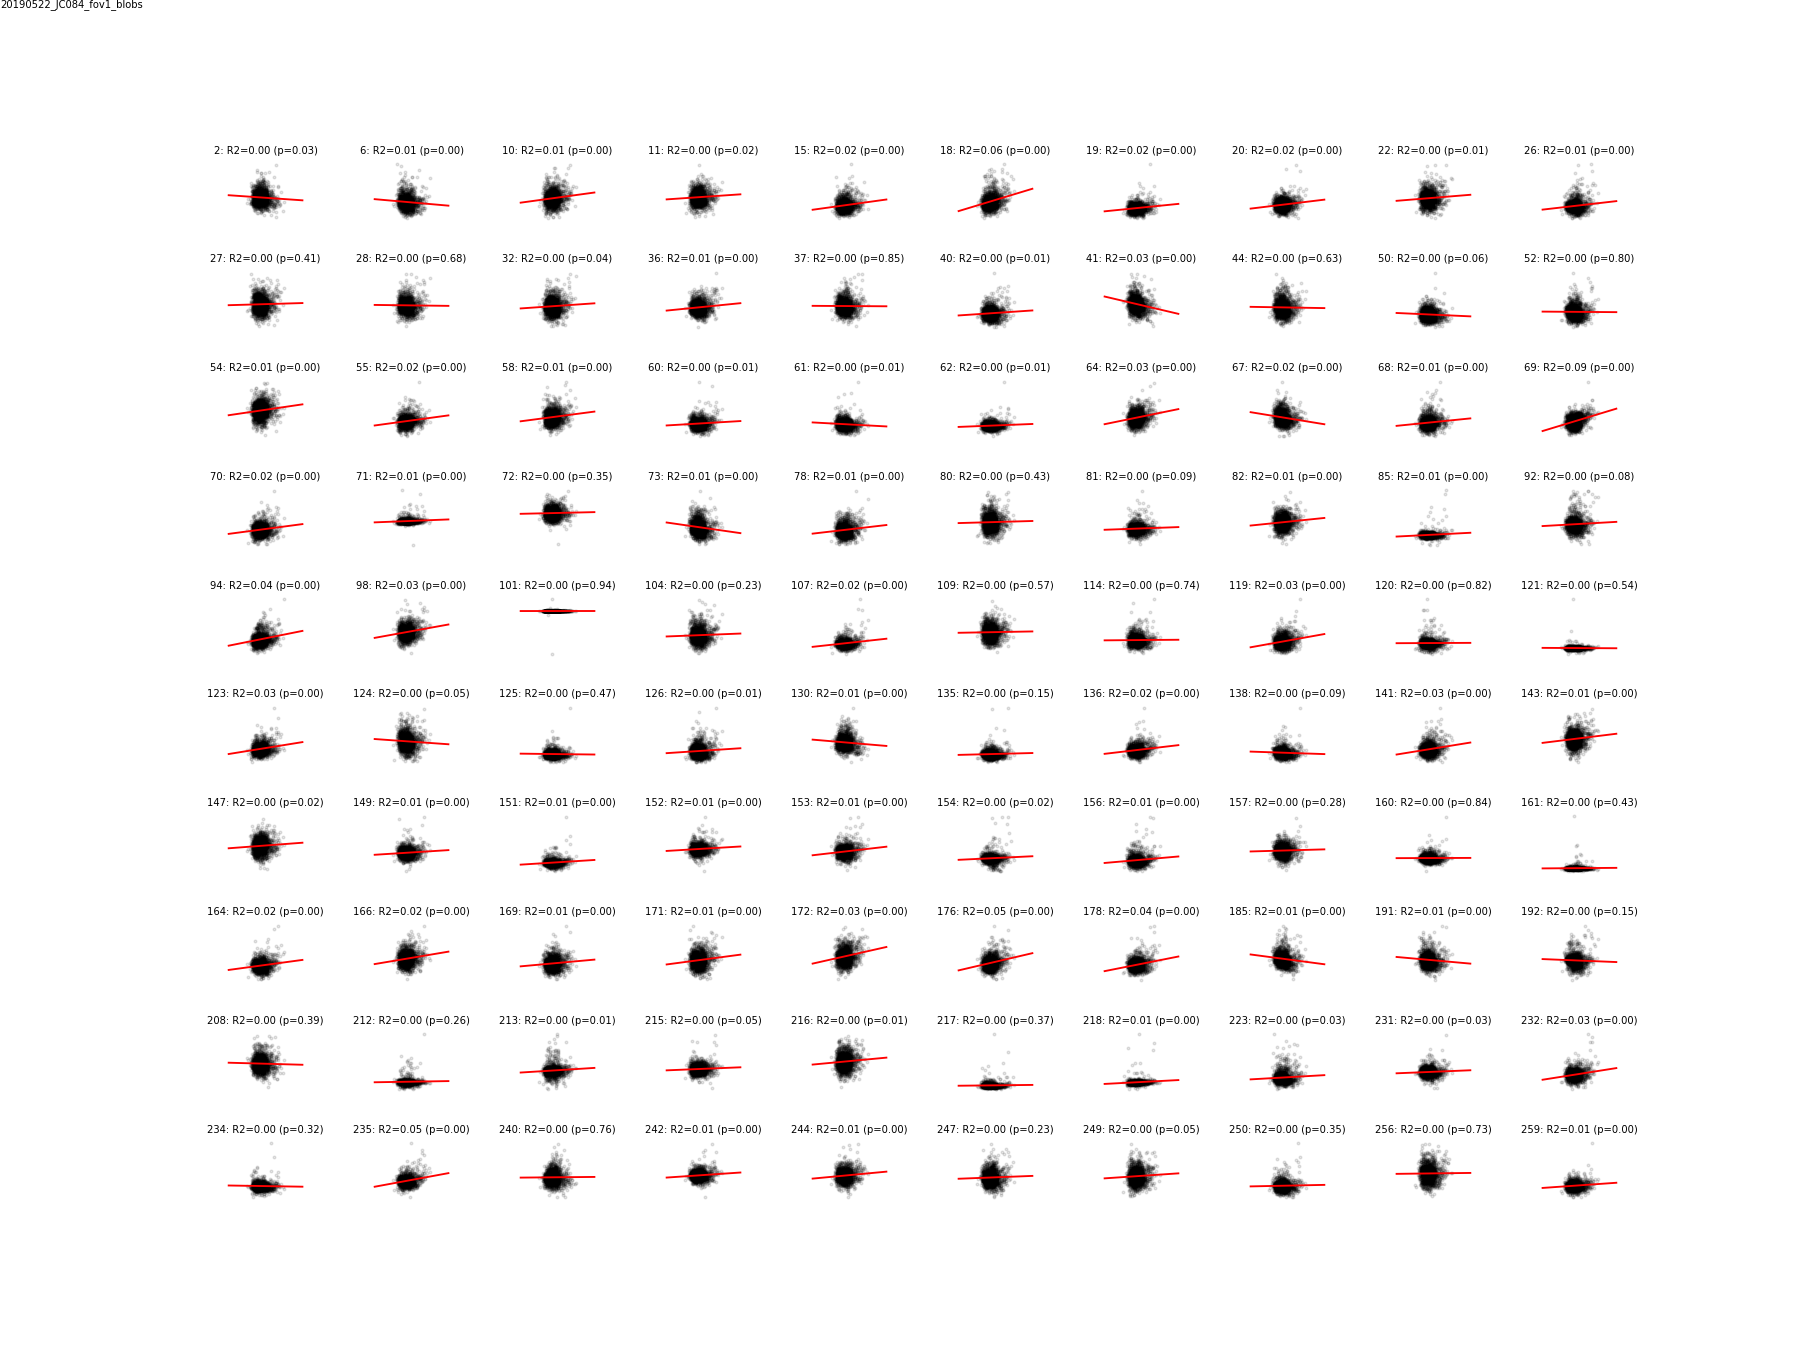

In [695]:
nr = 10
nc = 10

ai = 0
fig, axes = pl.subplots(nr, nc, figsize=(nc*2, nr*1.5))
fig.patch.set_alpha(1)

for rid in responsive_cells:
    ax = axes.flat[ai]
    roi_index = list(responsive_cells).index(rid)
    
    # scatter-plot data
    ax = xdf.plot(x=indepvar_x, y=rid, kind='scatter', alpha=0.1, s=5, c='k', ax=ax)
    #ax.scatter(x_test, y_test,  color='black', alpha=0.5, s=5)

    # generate x-values for your regression line (two is sufficient)
    vmin = xdf[indepvar_x].min()
    vmax = xdf[indepvar_x].max()
    vrange = vmax - vmin
    x = np.linspace(vmin-vrange*.5, vmax+vrange*.5, 3)

    # plot regression line on the same axes, set x-axis limits
    p = ols[rid].params
    ax.plot(x, p.const + p[indepvar_x] * x, color='r')
    #ax.set_xlim([1, 2])

    #modelfit.summary()

    statstr = 'R2=%.2f (p=%.2f)' % (ols[rid].rsquared, ols[rid].f_pvalue)
    #ax.set_title(statstr)

    ax.set_title('%i: %s' % (int(rid+1), statstr), fontsize=8)
    ax.axis('off')

    ai += 1
    
pl.subplots_adjust(hspace=0.8, wspace=0.8)
label_figure(fig, datakey)

[513,
 518,
 519,
 11,
 15,
 530,
 19,
 20,
 22,
 24,
 26,
 28,
 31,
 32,
 34,
 42,
 43,
 48,
 50,
 51,
 54,
 55,
 58,
 59,
 60,
 62,
 65,
 66,
 523,
 69,
 72,
 74,
 75,
 76,
 77,
 85,
 109,
 531,
 126,
 134,
 135,
 137,
 138,
 166,
 169,
 176,
 187,
 196,
 205,
 206,
 209,
 211,
 219,
 234,
 235,
 242,
 243,
 248,
 249,
 251,
 252,
 255,
 256,
 257,
 261,
 266,
 267,
 270,
 272,
 277,
 303,
 304,
 305,
 311,
 316,
 317,
 322,
 326,
 327,
 331,
 332,
 333,
 334,
 341,
 343,
 354,
 362,
 370,
 376,
 378,
 382,
 383,
 387,
 396,
 399,
 401,
 404,
 409,
 414,
 417,
 418,
 429,
 438,
 441,
 447,
 448,
 449,
 453,
 455,
 456,
 457,
 458,
 459,
 464,
 484,
 495,
 496,
 497,
 498,
 499,
 510,
 511]

In [790]:
responsive_cells = ols.keys()
R2 = pd.DataFrame({'R2': [ols[rid].rsquared for rid in responsive_cells],
                   'pval': [ols[rid].f_pvalue for rid in responsive_cells]})
R2['sig'] = [1 if p<0.05 else 0 for p in R2['pval']]
R2['empty'] = [1 for _ in np.arange(0, R2.shape[0])]

<IPython.core.display.Javascript object>


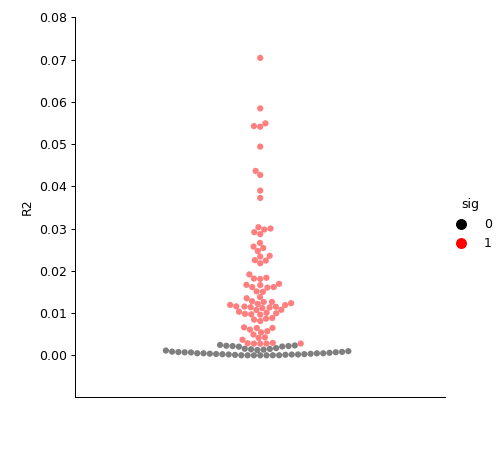

In [791]:

sns.catplot(x='empty', y='R2', kind='swarm', palette=['k', 'r'],
            hue='sig', data=R2, alpha=0.5) #, ax=ax) #color='k', alpha=0.1, ax=ax)
pl.ylabel('R2')
pl.xticks([])
pl.xlabel('')

label_figure(fig, datakey)

# Distribution of R2

In [702]:
R2 = pd.DataFrame({'R2': [ols[rid].rsquared for rid in responsive_cells],
                   'pval': [ols[rid].f_pvalue for rid in responsive_cells]})
R2['sig'] = [1 if p<0.05 else 0 for p in R2['pval']]

In [711]:
R2['empty'] = [1 for _ in np.arange(0, R2.shape[0])]

<IPython.core.display.Javascript object>


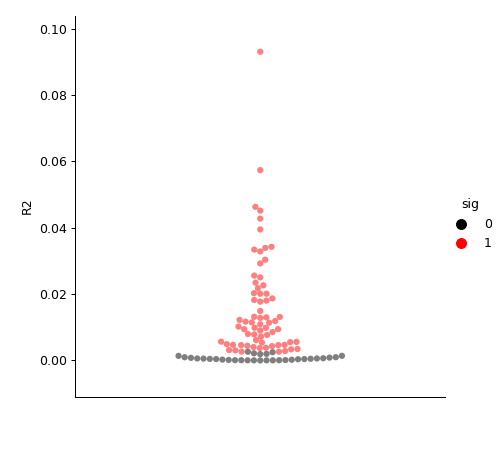

In [716]:

sns.catplot(x='empty', y='R2', kind='swarm', palette=['k', 'r'],
            hue='sig', data=R2, alpha=0.5) #, ax=ax) #color='k', alpha=0.1, ax=ax)
pl.ylabel('R2')
pl.xticks([])
pl.xlabel('')

label_figure(fig, datakey)



<IPython.core.display.Javascript object>


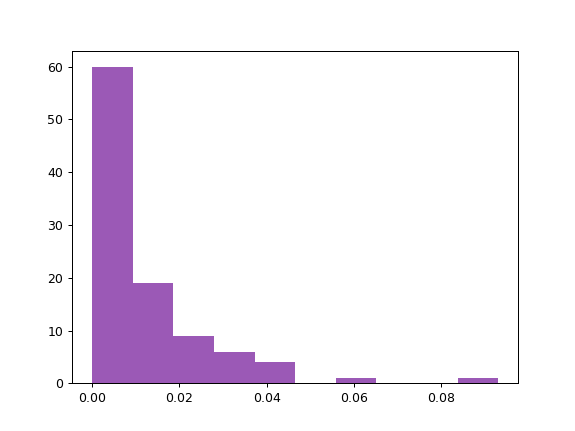

(array([ 60.,  19.,   9.,   6.,   4.,   0.,   1.,   0.,   0.,   1.]),
 array([  4.17311769e-06,   9.31060022e-03,   1.86170273e-02,
          2.79234544e-02,   3.72298815e-02,   4.65363086e-02,
          5.58427357e-02,   6.51491628e-02,   7.44555899e-02,
          8.37620170e-02,   9.30684441e-02]),
 <a list of 10 Patch objects>)

In [717]:
pl.figure()
pl.hist(R2['R2'])